<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🎓 Student Lifestyle 📚
    </h1>
</div>


# Overview

**Background**

This dataset contains **lifestyle records of university students**, focusing on how they allocate time to different daily activities.
It provides information on **study habits, extracurricular participation, sleep duration, social interactions, physical activities, academic performance (GPA)**, and **stress levels**.

Understanding student lifestyle is valuable for analyzing **the balance between academic work and personal well-being**, identifying **factors that influence stress and performance**, and supporting **educational planning and student support programs**.

**Goal of the Project**

Build a machine learning model to:

* **Predict stress level** based on lifestyle patterns (study hours, sleep, activities, etc.)
* Identify **key drivers of academic performance and well-being**
* Provide insights for **students, educators, and policymakers** to promote healthier and more balanced lifestyles

**Key Features**

| Feature Name                      | Description                                                      |
| --------------------------------- | ---------------------------------------------------------------- |
| `Student_ID`                      | Unique identifier for each student                               |
| `Study_Hours_Per_Day`             | Number of hours spent studying daily                             |
| `Extracurricular_Hours_Per_Day`   | Hours spent on extracurricular activities (arts, clubs, hobbies) |
| `Sleep_Hours_Per_Day`             | Hours of sleep per day                                           |
| `Social_Hours_Per_Day`            | Hours spent in social interactions                               |
| `Physical_Activity_Hours_Per_Day` | Hours engaged in physical exercise                               |
| `GPA`                             | Student’s Grade Point Average (academic performance)             |
| `Stress_Level`                    | Level of stress experienced (target variable)                    |

**Files Provided**

* `student_lifestyle_dataset.csv`: Main dataset containing student lifestyle and performance records.

**Project Objective**

The goal of this notebook is to **model and predict student stress levels**, helping to:

* Identify lifestyle factors that **influence stress and academic outcomes**
* Support interventions for **time management and well-being improvement**
* Provide **evidence-based recommendations** for student support services

**Key Steps**

* **Exploratory Data Analysis (EDA):** <br>
  Study the distribution of lifestyle variables and their relation to stress and GPA.

* **Modeling:**
  Train and compare multiple models:

  * Logistic Regression / Random Forest (for classification if stress level is categorical)
  * Regression models (if stress level is continuous)
  * Ensemble methods
  ...

* **Evaluation Framework:**

* **Cross-validation** to ensure robust performance estimation.
* **Classification metrics**:

  * **Accuracy**: Overall percentage of correctly classified students.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [213]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import (roc_curve, roc_auc_score, classification_report, confusion_matrix,
                             precision_recall_curve, auc)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [176]:
# Load the datasets
df_student = pd.read_csv("student_lifestyle_dataset.csv")

# Verify shapes
print("Data Shape:", df_student.shape)

Data Shape: (2000, 8)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [177]:
# Display few rows of dataset
print("Data Preview:")
display(df_student.head())

Data Preview:


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [178]:
# Display information about the DataFrames
print("Data Info:")
df_student.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **2000** samples with **8** columns, including the target variable `Stress_Level`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `Study_Hours_Per_Day`, `Extracurricular_Hours_Per_Day`, `Sleep_Hours_Per_Day`, `Social_Hours_Per_Day`, `Physical_Activity_Hours_Per_Day`, `GPA`
     - **Categorical features:** `Stress_Level`.
   - The target variable is **categorical** variable.

**Data Completeness**  
   - The dataset have **no missing values**.
   - Data types are appropriate: numerical features are int64 and float64 and categorical features is object.

In [179]:
df_student.columns = (
    df_student.columns
    .str.strip()
)

In [180]:
num_features = ["Study_Hours_Per_Day", "Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day",
                "Social_Hours_Per_Day", "Physical_Activity_Hours_Per_Day", "GPA"]

print("Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_student.drop(columns=["Stress_Level", "Student_ID"], axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,2000.000000,7.475800,1.423888,5.000000,6.300000,7.400000,8.700000,10.000000
Extracurricular_Hours_Per_Day,2000.000000,1.990100,1.155855,0.000000,1.000000,2.000000,3.000000,4.000000
Sleep_Hours_Per_Day,2000.000000,7.501250,1.460949,5.000000,6.200000,7.500000,8.800000,10.000000
Social_Hours_Per_Day,2000.000000,2.704550,1.688514,0.000000,1.200000,2.600000,4.100000,6.000000
Physical_Activity_Hours_Per_Day,2000.000000,4.328300,2.514110,0.000000,2.400000,4.100000,6.100000,13.000000
GPA,2000.000000,3.115960,0.298674,2.240000,2.900000,3.110000,3.330000,4.000000


## Descriptive Insights – Numerical Features

1. **Study\_Hours\_Per\_Day**

* **Mean \~ 7.48h**, with relatively low variation (std \~ 1.42).
* Distribution mostly within **6.3h (Q1) → 8.7h (Q3)**.
* **Min = 5h, Max = 10h**, indicating most students study between **5–10h/day**, which is relatively high.

→ Suggests heavy academic workload, potentially linked to **Stress\_Level**.

2. **Extracurricular\_Hours\_Per\_Day**

* **Mean \~ 2h**, std \~ 1.15.
* Narrow range: **0–4h**.
* 50% of students spend **≤ 2h/day** on extracurricular activities.

→ Indicates extracurriculars are relatively limited, possibly serving as a **balancing factor** between academics and stress.

3. **Sleep\_Hours\_Per\_Day**

* **Mean \~ 7.5h**, std \~ 1.46.
* Most students sleep **5–10h/day**.
* 50% fall between **6.2h → 8.8h**.

→ Sleep habits appear fairly healthy (close to the recommended 7–8h). However, students sleeping **< 6h** may face **higher stress risks**.

4. **Social\_Hours\_Per\_Day**

* **Mean \~ 2.7h**, std \~ 1.68.
* Broad range: **0h → 6h**.
* Median \~ 2.6h; 75% of students spend < 4.1h socializing.

→ Significant differences between introverted and extroverted students. Likely an important factor related to stress and GPA.

5. **Physical\_Activity\_Hours\_Per\_Day**

* **Mean \~ 4.3h**, with high variation (std \~ 2.51).
* Range: **0h → 13h** (some students are very physically active).
* Median \~ 4.1h; Q3 = 6.1h → certain students dedicate much more time to sports.

→ This variation may strongly impact both **stress** and **GPA**.

6. **GPA**

* **Mean \~ 3.12/4**, with low variation (std \~ 0.30).
* 50% of students have GPAs between **2.9 → 3.3**.
* Range: 2.24 → 4.0 → very few students are at the extremes.

→ GPA is relatively stable across students, which may limit its effectiveness as a predictive target variable.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [181]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"✅ No missing values detected in {rows:,} rows")
        else:
            print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

displayNULL(df=df_student, dataset_name="Data", style=2)

Data Missing Value Analysis
✅ No missing values detected in 2,000 rows


## Checking duplicate Value

In [182]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df_student, dataset_name="Data")
duplicate_summary["Data"] = {
    "duplicates": df_student.duplicated().sum(),
    "total_rows": len(df_student)
}

🔍 Data Duplicate Analysis
✅ No duplicates found in 2,000 rows


## Checking Outlier Value

In [183]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=num_features, df=df_student, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,Physical_Activity_Hours_Per_Day,5
1,GPA,4


## Data Quality Insights: Missing Values, Duplicates and Outliers

**Missing Values Analysis**

- We conducted a thorough check for missing values in the datasets.  
- **No missing values** in the datasets.

**Duplicate Records Analysis**

- We conducted a thorough check for duplicating value in the datasets.  
- **No duplicate values** in the datasets.

**Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [184]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [185]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Stress_Level Distribution

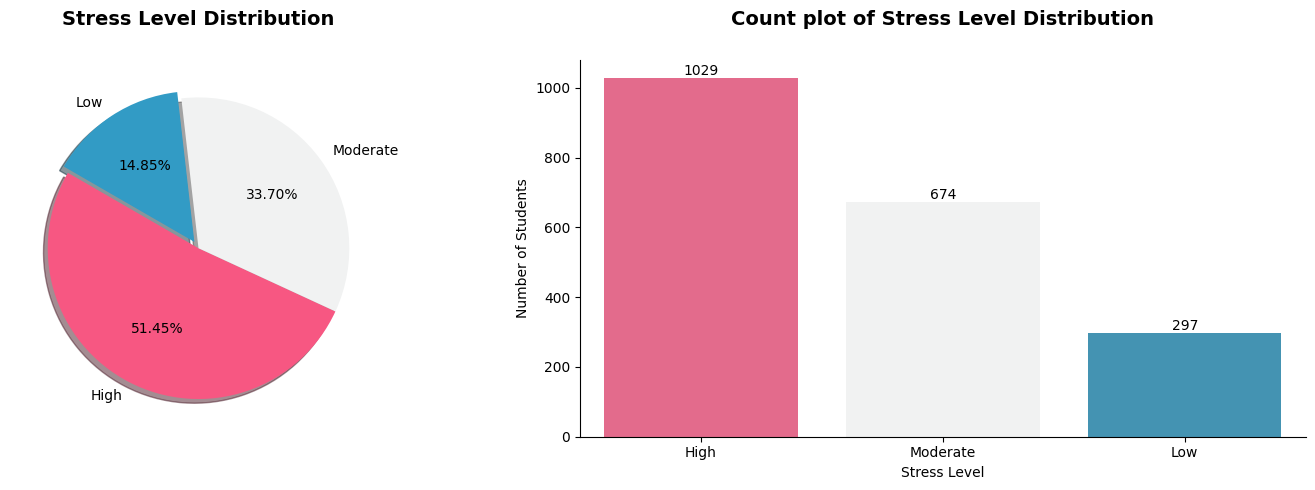

In [186]:
stress_level_Distribution  = df_student["Stress_Level"].value_counts()
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
n_color = color(n_colors=df_student["Stress_Level"].nunique())
# ax[0]
ax[0].pie(
    stress_level_Distribution,
    labels = ["High","Moderate", "Low"],
    colors = n_color,
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0, 0.05),
    shadow= True
)
ax[0].set_title("Stress Level Distribution",  weight="bold", fontsize=14, pad=25)

# ax[1]
sns.countplot(data=df_student, x = "Stress_Level", palette=n_color, 
              ax=ax[1], order=["High","Moderate", "Low"])
ax[1].set_title("Count plot of Stress Level Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10)
ax[1].set_ylabel("Number of Students")
ax[1].set_xlabel("Stress Level")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

### Insights into Stress Level Distribution

**Frequency of stress categories**

* The pie chart and count plot illustrate the distribution of stress levels among students.
* `High` stress is the dominant group with **1029 students**, accounting for approximately **51.45%** of the dataset.
* `Moderate` stress follows with **674 students**, representing **33.70%**.
* `Low` stress is the smallest group with only **297 students**, making up **14.85%** of the dataset.

***Over half of the students experience high stress, which highlights a significant concern for student well-being. The dataset is imbalanced, with the high-stress group being the majority. This imbalance must be addressed in modeling to avoid biased predictions toward the high-stress category.***

## Numerical Feature Distributions

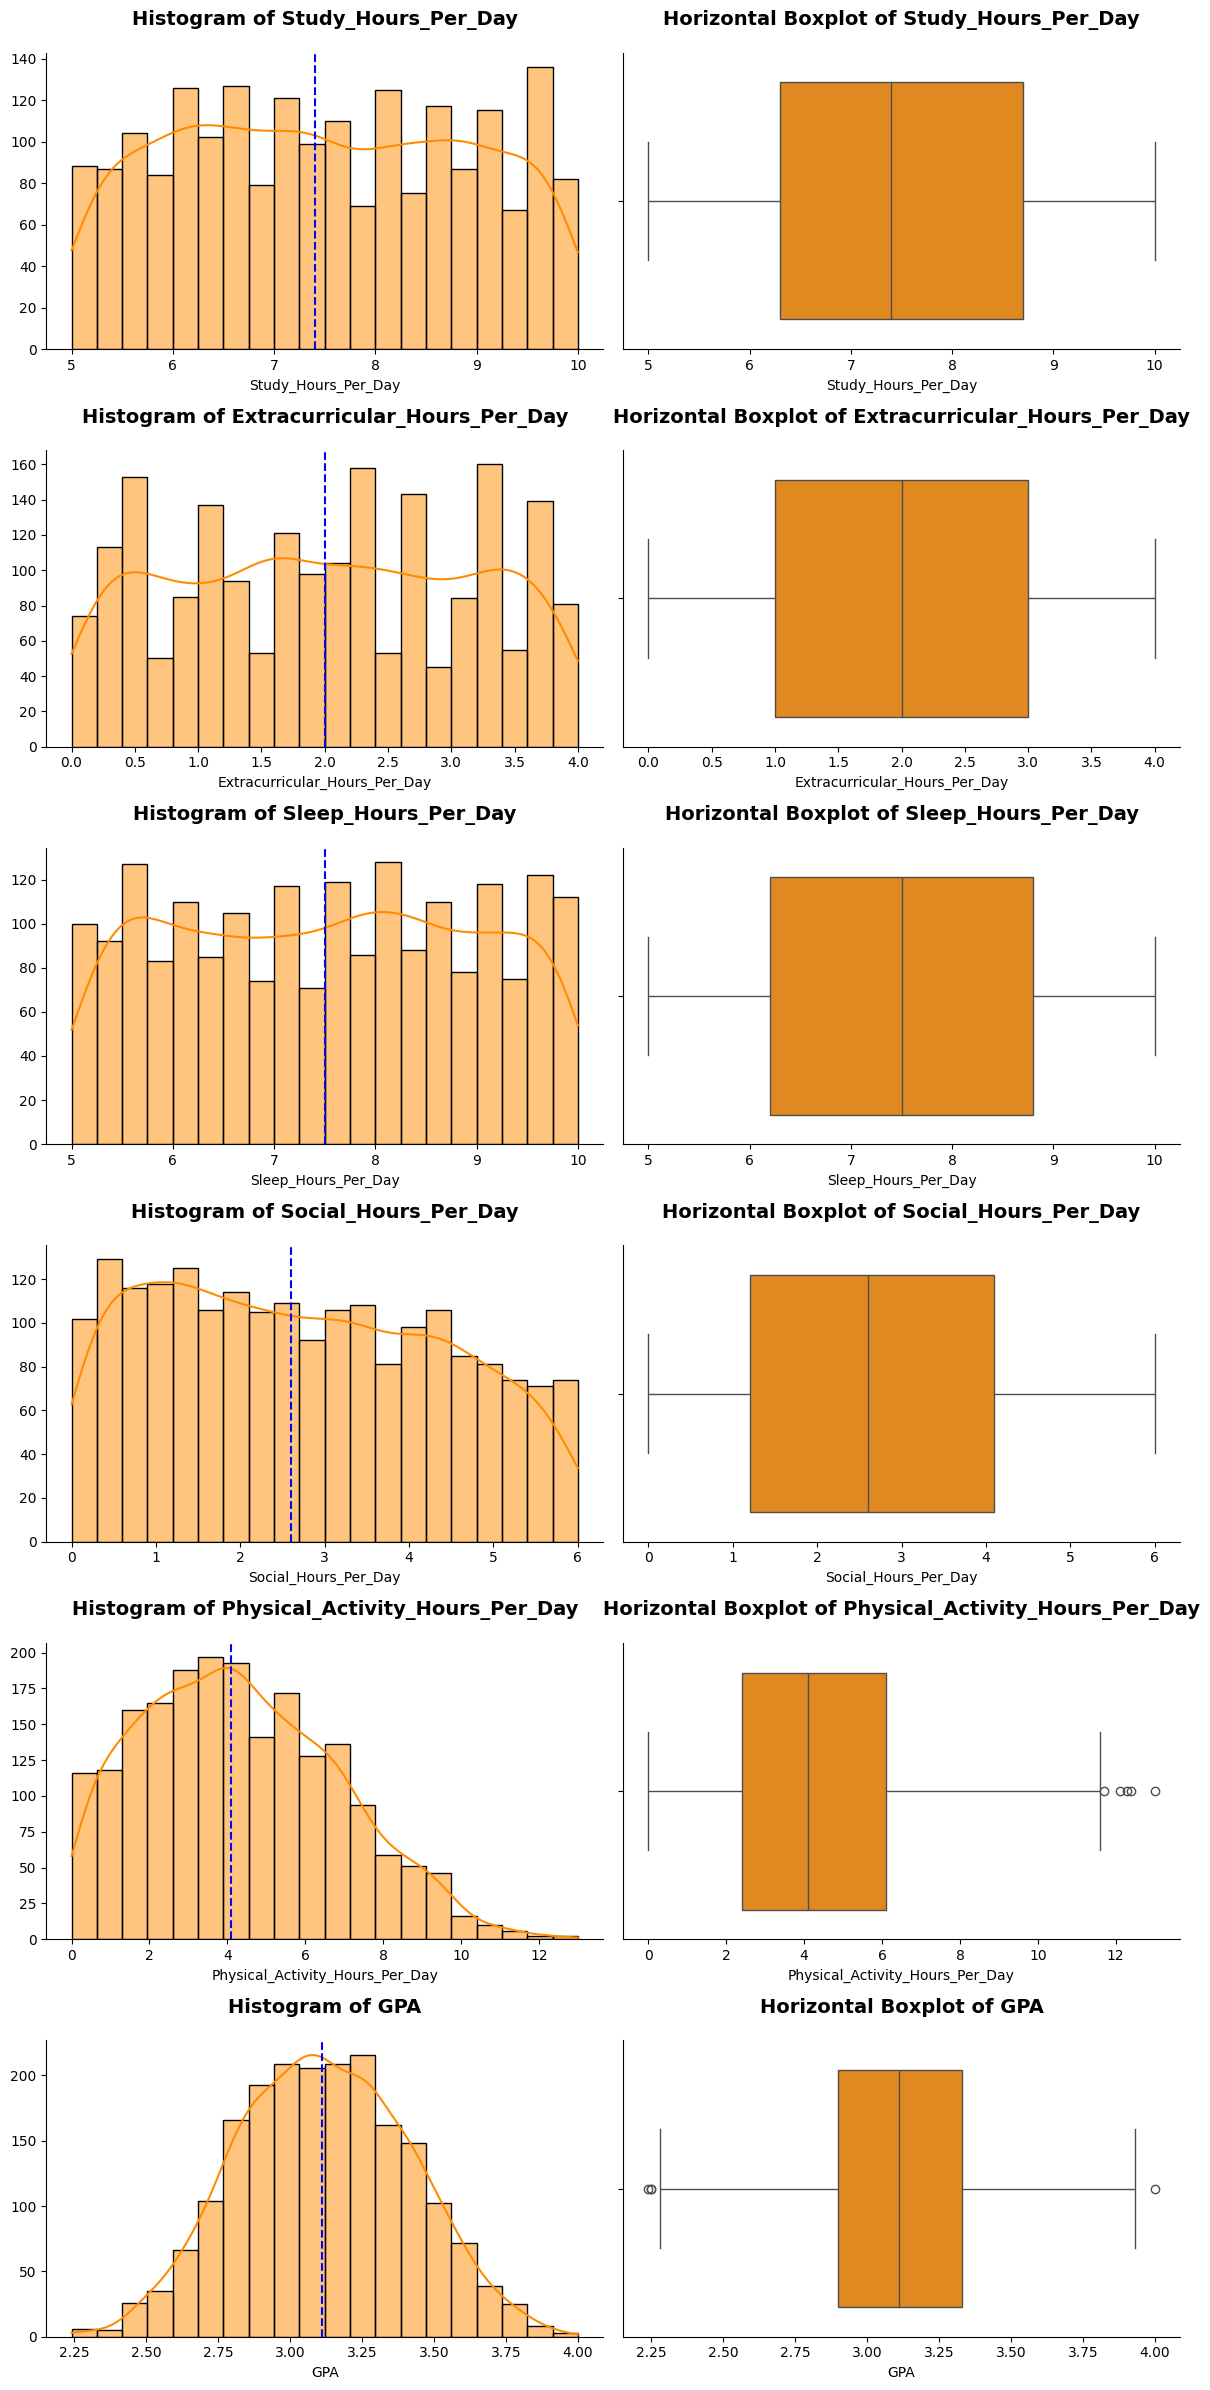

In [187]:
def plot_numerical_features(df=df_student, numerical_features = num_features):
    fig, ax = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="darkorange", bins = 20, kde=True, ax=ax[i, 0])
        ax[i, 0].set_title(f"Histogram of {feature}", weight="bold", fontsize=14, pad=20)
        ax[i, 0].set_ylabel("")
        ax[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")
        sns.despine(ax=ax[i, 0], top=True, right=True, left=False, bottom=False)

        sns.boxplot(data=df[feature], color="darkorange", orient="h", ax=ax[i, 1])
        ax[i, 1].set_title(f"Horizontal Boxplot of {feature}", weight="bold", fontsize=14, pad=20)
        ax[i, 1].set_xlabel(feature)
        sns.despine(ax=ax[i, 1], top=True, right=True, left=False, bottom=False)


    plt.tight_layout()
    plt.show()
plot_numerical_features()

In [188]:
def check_skewness(data = df_student, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*75)
    print(f"{'Feature':<35} | {'Skewness':<10} | {'Remark'}")
    print("-"*75)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<35} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<35} | {skew:>+10f} | {remark}")
    print("-"*75)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
---------------------------------------------------------------------------
Feature                             | Skewness   | Remark
---------------------------------------------------------------------------
Physical_Activity_Hours_Per_Day     |  +0.399239 | Approximately symmetric
Social_Hours_Per_Day                |  +0.184222 | Approximately symmetric
Study_Hours_Per_Day                 |  +0.034988 | Approximately symmetric
GPA                                 |  +0.027516 | Approximately symmetric
Sleep_Hours_Per_Day                 |  -0.007096 | Approximately symmetric
Extracurricular_Hours_Per_Day       |  +0.001263 | Approximately symmetric
---------------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Boxplots** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

* All numerical variables in the dataset have **very low skewness**, ranging from `-0.01 → +0.39`.
* This indicates that the **data distribution is approximately symmetric**, with no variable showing strong left or right skewness.
* Variables such as **Study Hours, Sleep Hours, GPA, and Extracurricular Hours** are highly balanced in distribution.
* **Physical Activity Hours** show **slight right skewness**.

**Key Insight**

* The dataset has a **clean and well-balanced distribution** overall.
* No special transformations (e.g., log, Box-Cox) are required, only **scaling/normalization** before modeling.

### Correlation Analysis of Numerical Features (Spearman)

1. **What is Spearman Correlation?**

**Spearman’s rank correlation coefficient (ρ, “rho”)** measures the **strength and direction of a monotonic relationship** (increasing or decreasing, not necessarily linear) between two variables.

* Unlike Pearson (which assumes linearity and normal distribution), **Spearman works with ranks** of the data, making it more robust for skewed data or outliers.
* The coefficient **ρ** ranges from **-1 to 1**, similar to Pearson.

2. **Interpretation of Spearman Values**

| Value of ρ | Relationship Type         | Interpretation                                                   |
| ---------- | ------------------------- | ---------------------------------------------------------------- |
| `ρ ≈ 1`    | Strong positive monotonic | As X increases, Y also increases (not always at a constant rate) |
| `ρ ≈ -1`   | Strong negative monotonic | As X increases, Y decreases (not always at a constant rate)      |
| `ρ ≈ 0`    | No monotonic correlation  | No consistent increasing/decreasing trend between X and Y        |

**Common interpretation of |ρ|**

* **0.0 – 0.19** → Very weak
* **0.2 – 0.39** → Weak
* **0.4 – 0.59** → Moderate
* **0.6 – 0.79** → Strong
* **0.8 – 1.0** → Very strong

3. **Spearman Correlation Formula**

If there are no tied ranks:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

* \$d\_i\$: difference between the ranks of corresponding values
* \$n\$: number of observations

If there are ties, a more general covariance formula is used:

$$
\rho = \frac{\text{cov}(R(X), R(Y))}{\sigma_{R(X)} \, \sigma_{R(Y)}}
$$

where \$R(X)\$ and \$R(Y)\$ are the ranked variables.

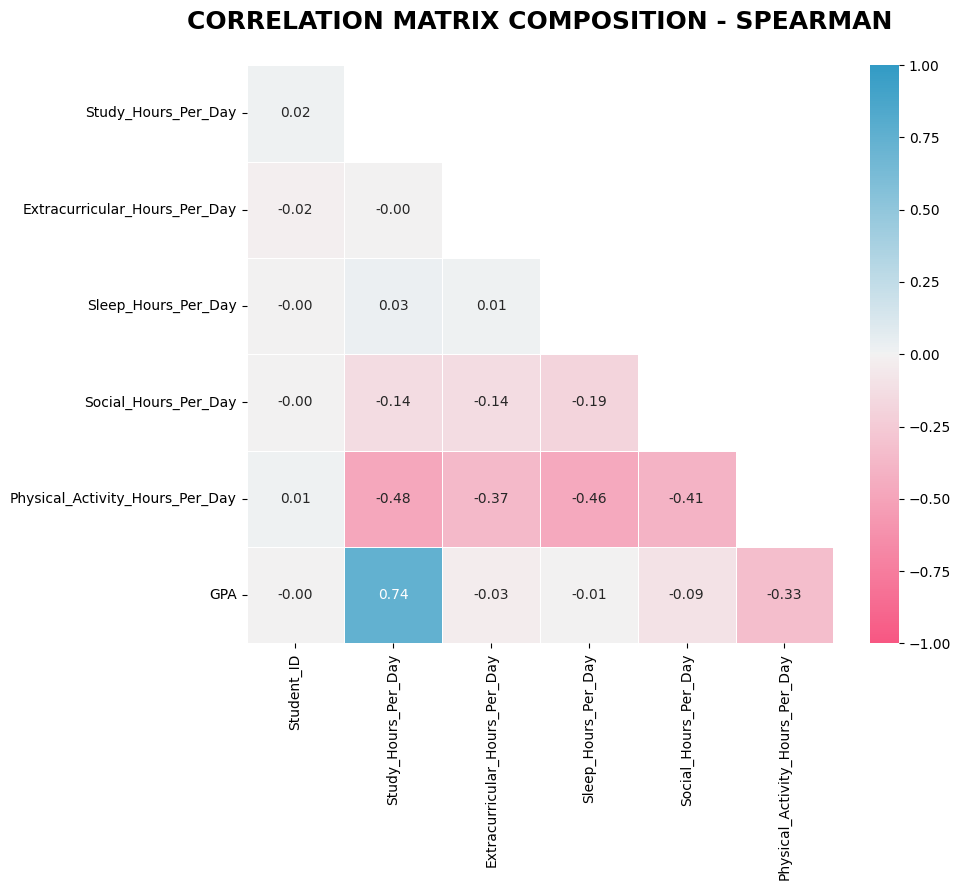

In [189]:
corr_matrix = df_student.drop(columns="Stress_Level", axis=1).corr(numeric_only=True, method="spearman")
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION - SPEARMAN\n"
ax.set_title(title, loc="center", fontsize=18, weight="bold");
plt.tight_layout()
plt.show()

#### Insights from Correlation Analysis of Numerical Features

* **Study Hours ↔ GPA**: The strongest relationship with a coefficient of **+0.74** → more study hours per day are strongly associated with higher GPA. This is the most prominent correlation in the dataset.

* **Physical Activity ↔ Others**: Physical activity shows **negative correlations** with several variables:

  * GPA (**-0.33**) → students who spend more time on physical activity tend to have lower GPA.
  * Study Hours (**-0.48**) and Sleep Hours (**-0.37**) → more exercise is linked to reduced study and sleep time.
  * Social Hours (**-0.41**) → physically active students tend to spend less time on social interactions.

* **Social Hours ↔ Sleep/Study**: Slight negative correlations (**-0.14 → -0.19**), suggesting that more time in social activities slightly reduces study and sleep time.

* **Extracurricular Hours**: Almost no meaningful correlation with GPA or other variables (≈ 0).

**Key Insight**

* **Study hours** are the most important factor associated with **GPA**.
* **Physical activity** shows clear trade-offs with study, sleep, and GPA.
* **Social hours** have a small but negative effect on study and sleep time.
* **Extracurricular activities** appear to have no significant impact in this dataset.

## Bivariate Analysis

,Stress_Level,Count,Mean,Median,Std
0,High,1029,8.385034,8.700000,1.238311
2,Moderate,674,6.969585,7.000000,0.597576
1,Low,297,5.474411,5.500000,0.279753


🔎 D’Agostino and Pearson Normality Test for 'Study_Hours_Per_Day' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 364.887
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 167.024
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 119.854
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Study_Hours_Per_Day ~ Stress_Level
Kruskal-Wallis H-statistic: 1093.476
p-value: 3.58734512932608e-238
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                   High            Low      Moderate
High       1.000000e+00  4.239753e-213  1.606801e-86
Low       4.239753e-213   1.000000e+00  2.947090e-53
Moderate   1.606801e-86   2.947090e-53  1.000000e+00


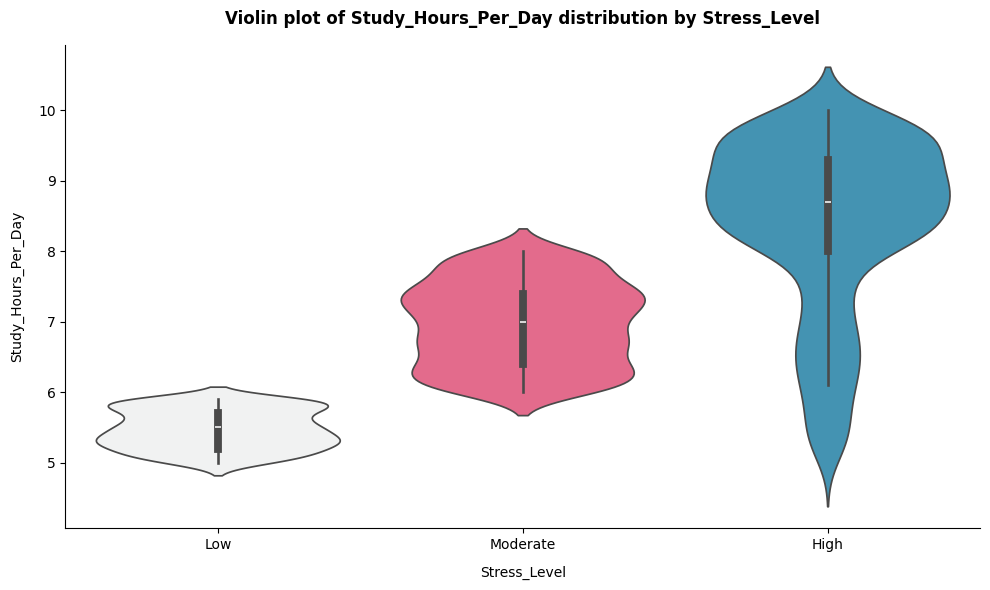

,Stress_Level,Count,Mean,Median,Std
2,Moderate,674,2.006380,2.000000,1.142807
1,Low,297,1.988889,2.000000,1.200075
0,High,1029,1.979786,2.000000,1.152370


🔎 D’Agostino and Pearson Normality Test for 'Extracurricular_Hours_Per_Day' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 308.947
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 216.748
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 692.737
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Extracurricular_Hours_Per_Day ~ Stress_Level
Kruskal-Wallis H-statistic: 0.215
p-value: 0.8979951222784179

ℹ️ No significant difference found (p >= 0.05)


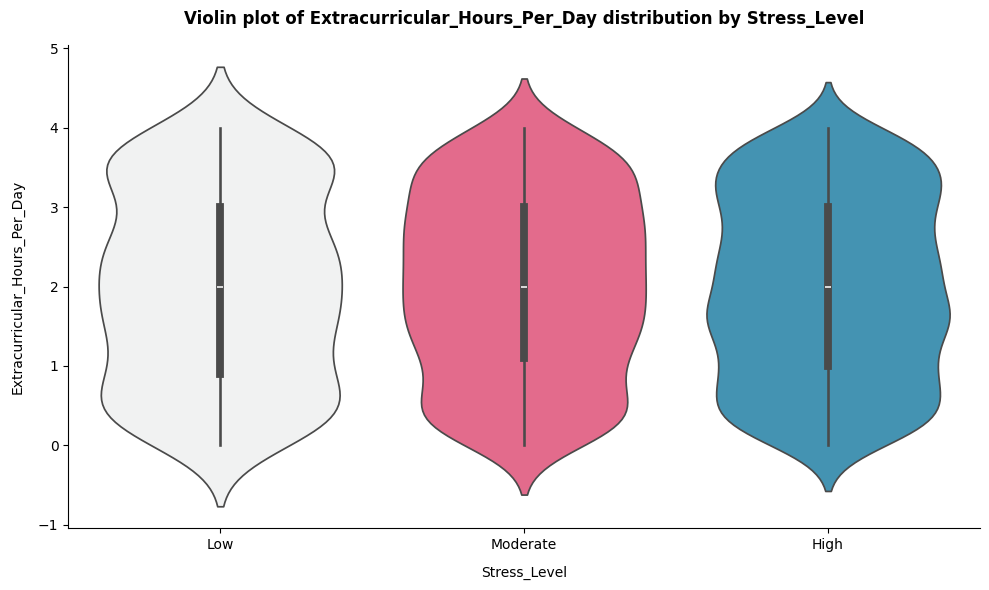

,Stress_Level,Count,Mean,Median,Std
1,Low,297,8.063973,8.000000,1.205259
2,Moderate,674,7.947626,7.900000,1.167592
0,High,1029,7.046453,6.800000,1.552568


🔎 D’Agostino and Pearson Normality Test for 'Sleep_Hours_Per_Day' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 365.199
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 199.883
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 1880.989
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Sleep_Hours_Per_Day ~ Stress_Level
Kruskal-Wallis H-statistic: 205.727
p-value: 2.1234778989181563e-45
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                  High           Low      Moderate
High      1.000000e+00  1.412689e-25  6.719367e-35
Low       1.412689e-25  1.000000e+00  7.463276e-01
Moderate  6.719367e-35  7.463276e-01  1.000000e+00


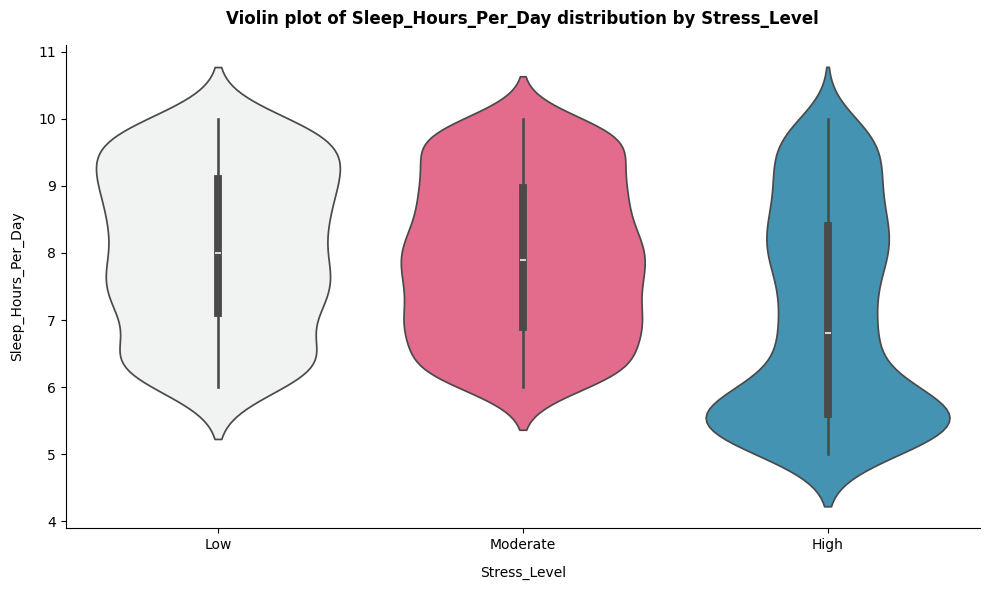

,Stress_Level,Count,Mean,Median,Std
1,Low,297,2.890909,3.000000,1.673669
2,Moderate,674,2.739614,2.600000,1.692064
0,High,1029,2.627794,2.400000,1.687129


🔎 D’Agostino and Pearson Normality Test for 'Social_Hours_Per_Day' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 304.127
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 167.202
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 310.585
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Social_Hours_Per_Day ~ Stress_Level
Kruskal-Wallis H-statistic: 6.257
p-value: 0.04377513575022688
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
              High       Low  Moderate
High      1.000000  0.047746  0.526485
Low       0.047746  1.000000  0.564313
Moderate  0.526485  0.564313  1.000000


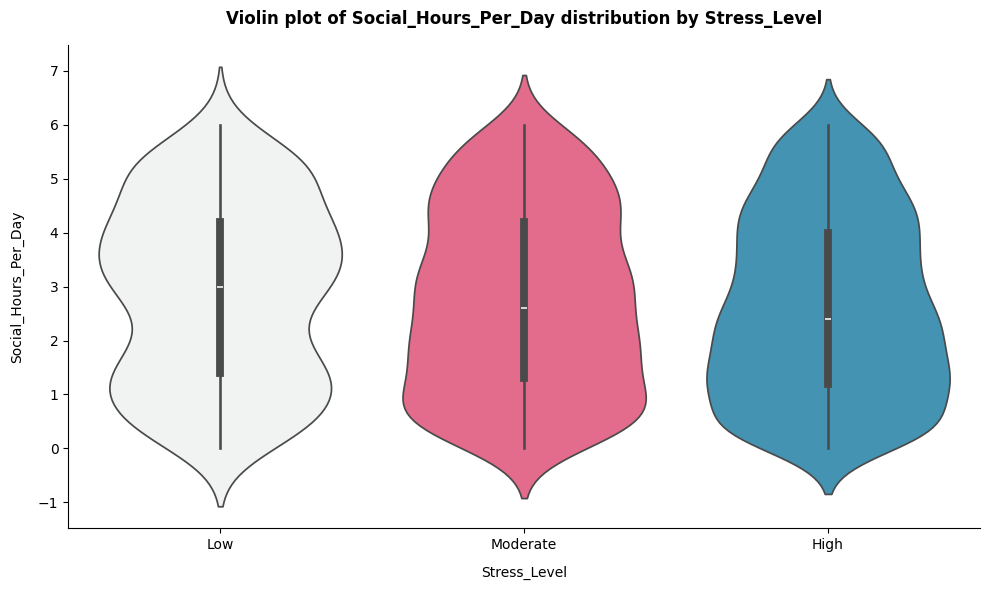

,Stress_Level,Count,Mean,Median,Std
1,Low,297,5.581818,5.300000,2.377216
2,Moderate,674,4.336795,4.250000,2.243163
0,High,1029,3.960933,3.600000,2.603957


🔎 D’Agostino and Pearson Normality Test for 'Physical_Activity_Hours_Per_Day' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 20.738
  p-value   : 0.00003
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 1.395
  p-value   : 0.49773
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 61.245
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Physical_Activity_Hours_Per_Day ~ Stress_Level
Kruskal-Wallis H-statistic: 104.173
p-value: 2.3944866003704447e-23
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                  High           Low      Moderate
High      1.000000e+00  8.887013e-24  2.394735e-04
Low       8.887013e-24  1.000000e+00  3.071600e-11
Moderate  2.394735e-04  3.071600e-11  1.000000e+00


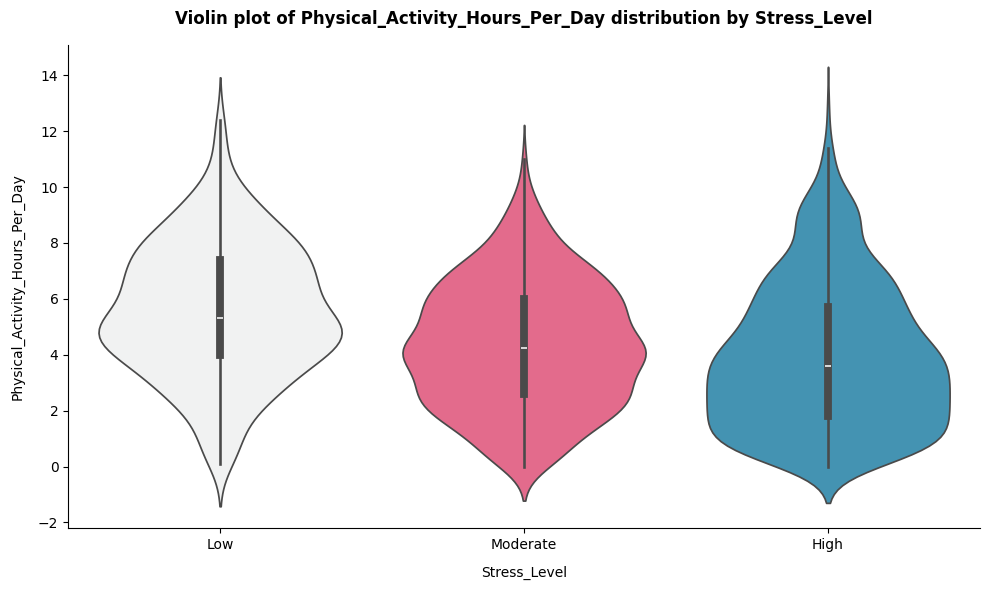

,Stress_Level,Count,Mean,Median,Std
0,High,1029,3.261973,3.270000,0.274960
2,Moderate,674,3.024837,3.020000,0.220653
1,Low,297,2.816869,2.820000,0.215396


🔎 D’Agostino and Pearson Normality Test for 'GPA' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 2.802
  p-value   : 0.24639
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 2.235
  p-value   : 0.32705
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 14.548
  p-value   : 0.00069
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: GPA ~ Stress_Level
Kruskal-Wallis H-statistic: 620.670
p-value: 1.671739017189201e-135
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                   High            Low      Moderate
High       1.000000e+00  9.345407e-114  6.752346e-61
Low       9.345407e-114   1.000000e+00  7.183471e-22
Moderate   6.752346e-61   7.183471e-22  1.000000e+00


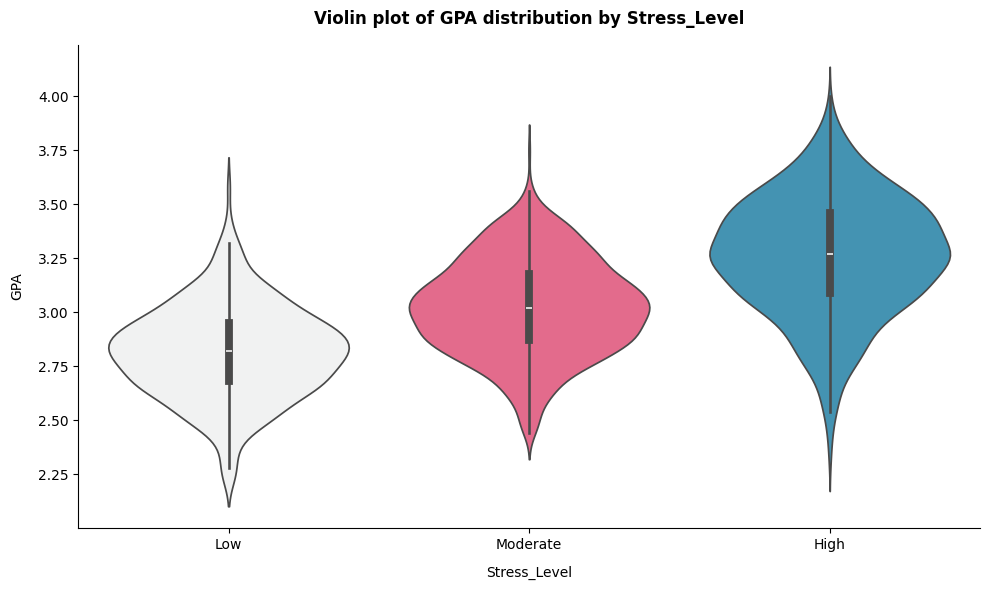

In [190]:
from IPython.core.display import HTML
target_feature = "Stress_Level"
order = ["Low", "Moderate", "High"]

def perform_statical_testing(feature, df=df_student, total_categories=2, target_feature=target_feature):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df)
    total_categories = df[target_feature].nunique()
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df, categorical_feature=target_feature, num_feature=feature)
    else:
        perform_kruskal_test(df=df, categorical_feature=target_feature, numeric_feature=feature)

def plot_numerical_distribution_by_target_feature(feature, df = df_student, target_feature = target_feature, order=order):
    """
    Performs statical testing for each groups (distribution by target_feature) by Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by {target_feature}</b></h2>"))
    # Summary information
    df_summary_feature = df.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df[feature].mean():.2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df, hue=target_feature, order=order,
                   palette=color(n_colors=len(df[target_feature].unique())), ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    plot_numerical_distribution_by_target_feature(feature=feature)

### Insight Numerical Features by Stress_Level

`Study_Hours_Per_Day`

* **Stress level increases with study hours per day**:

  * Nhóm stress cao học nhiều hơn rõ rệt so với nhóm stress trung bình và thấp.
* **Distributions are not normal** → dùng **Kruskal-Wallis & Dunn’s test** là phù hợp.
* Kết quả khẳng định **study hours là một trong những yếu tố quan trọng ảnh hưởng đến mức độ stress của sinh viên**.

`Extracurricular_Hours_Per_Day`

* **Extracurricular activities are not associated with stress level**:
  Students, regardless of being in high, moderate, or low stress groups, spend around **2h/day** on extracurricular activities.
* This suggests that **extracurricular involvement is not a distinguishing factor for stress levels** in this dataset.

`Social_Hours_Per_Day` 

* **Low-stress students socialize slightly more** compared to high-stress students.
* However, the overall differences are **very small** and not strongly discriminative.
* Conclusion: **Social hours is a weak predictor of stress**, showing only a faint trend that reduced social interactions may be linked to higher stress.

`Sleep_Hours_Per_Day`

* Students with **high stress sleep significantly less** compared to both low- and moderate-stress groups.
* **Low and moderate stress groups show similar sleep patterns**, suggesting that sleep reduction is specifically linked to high stress.
* Confirms the hypothesis that **reduced sleep duration is a strong indicator of higher stress levels**.

`Physical_Activity_Hours_Per_Day` 

* The **low-stress group engages in the highest level of physical activity**, while the **high-stress group shows the lowest level**.
* These differences are statistically significant and support the hypothesis that **regular physical activity helps reduce stress**.
* This is a crucial lifestyle factor that may serve as a **protective element against high stress**.

`GPA`

* **Students with higher stress tend to achieve higher GPA**, suggesting a trade-off between academic performance and well-being.
* **All three groups differ significantly**, indicating GPA is closely tied to stress levels.
* This supports the hypothesis that **academic pressure can boost GPA but simultaneously increase stress**, reflecting the trade-off between achievement and mental health.

| Feature                                 | Type      | Statistical Test Used        | Relationship with Stress Level | Summary                                                                                                 |
| --------------------------------------- | --------- | ---------------------------- | ------------------------------ | ------------------------------------------------------------------------------------------------------- |
| **Study\_Hours\_Per\_Day**              | Numerical | Kruskal–Wallis + Dunn’s Test | Significant                    | Students with **higher stress study significantly more hours** per day (High > Moderate > Low).         |
| **Extracurricular\_Hours\_Per\_Day**    | Numerical | Kruskal–Wallis               | Not Significant                | **No meaningful difference** in extracurricular time across stress groups (\~2h/day for all).           |
| **Sleep\_Hours\_Per\_Day**              | Numerical | Kruskal–Wallis + Dunn’s Test | Significant                    | **High-stress students sleep less** (mean \~7h) compared to low/moderate groups (\~8h).                 |
| **Physical\_Activity\_Hours\_Per\_Day** | Numerical | Kruskal–Wallis + Dunn’s Test | Significant                    | **Low-stress students are more physically active** (\~5.6h) than high-stress students (\~4h).           |
| **Social\_Hours\_Per\_Day**             | Numerical | Kruskal–Wallis + Dunn’s Test | Weakly Significant             | **Slight differences**: low-stress students socialize a bit more than high-stress students (p \~0.048). |
| **GPA**                                 | Numerical | Kruskal–Wallis + Dunn’s Test | Significant                    | **Higher stress is associated with higher GPA** (High \~3.26 > Moderate \~3.02 > Low \~2.82).           |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


In [191]:
df_student.drop(columns="Student_ID", axis=1, inplace=True)

## Feature Engineering

In [192]:
# Total_Activity_Hours
# Measures the overall activity level of a student.
df_student["Total_Activity_Hours"] = df_student["Extracurricular_Hours_Per_Day"] + df_student["Social_Hours_Per_Day"] + df_student["Physical_Activity_Hours_Per_Day"]

# Non_Study_Hours
# Assesses the balance between studying and personal life.
df_student["Non_Study_Hours"] = df_student["Extracurricular_Hours_Per_Day"] + df_student["Sleep_Hours_Per_Day"] + df_student["Social_Hours_Per_Day"] + df_student["Physical_Activity_Hours_Per_Day"]

# Study_Sleep_Ratio
# Stress may arise from studying more while sleeping less.
df_student["Study_Sleep_Ratio"] = df_student["Study_Hours_Per_Day"] / df_student["Sleep_Hours_Per_Day"]


# Academic_Load_Index
# Learning efficiency, measuring performance per study hour.
df_student["Academic_Load_Index"] = df_student["GPA"] / df_student["Study_Hours_Per_Day"]

# Social_Activity_Ratio
# Proportion of socially oriented activities vs. other activities.
df_student["Social_Activity_Ratio"] = df_student["Social_Hours_Per_Day"] / (df_student["Social_Hours_Per_Day"] + df_student["Physical_Activity_Hours_Per_Day"] + df_student["Extracurricular_Hours_Per_Day"])

# Physical_Sleep_Balance
# Evaluates balance between physical activity and rest.
df_student["Physical_Sleep_Balance"] = df_student["Physical_Activity_Hours_Per_Day"] / df_student["Sleep_Hours_Per_Day"]

# Work_Life_Balance
# Measures the balance between academics and lifestyle.
df_student["Work_Life_Balance"] = (
    (df_student["Study_Hours_Per_Day"] + df_student["GPA"]) /
    (
        df_student["Social_Hours_Per_Day"] +
        df_student["Physical_Activity_Hours_Per_Day"] +
        df_student["Extracurricular_Hours_Per_Day"] +
        df_student["Sleep_Hours_Per_Day"]
    )
)

# High_Stress_Risk_Flag
# Flags students at high risk of stress.
df_student["High_Stress_Risk_Flag"] = (
    (df_student["Study_Hours_Per_Day"] > 8) & 
    (df_student["Sleep_Hours_Per_Day"] < 7)
).astype(int)

df_student.head(5)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Total_Activity_Hours,Non_Study_Hours,Study_Sleep_Ratio,Academic_Load_Index,Social_Activity_Ratio,Physical_Sleep_Balance,Work_Life_Balance,High_Stress_Risk_Flag
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,8.4,17.1,0.793103,0.433333,0.333333,0.206897,0.578363,0
1,5.3,3.5,8.0,4.2,3.0,2.75,Low,10.7,18.7,0.662500,0.518868,0.392523,0.375000,0.430481,0
2,5.1,3.9,9.2,1.2,4.6,2.67,Low,9.7,18.9,0.554348,0.523529,0.123711,0.500000,0.411111,0
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,10.3,17.5,0.902778,0.443077,0.165049,0.902778,0.536000,0
4,8.1,0.6,6.5,2.2,6.6,3.51,High,9.4,15.9,1.246154,0.433333,0.234043,1.015385,0.730189,1


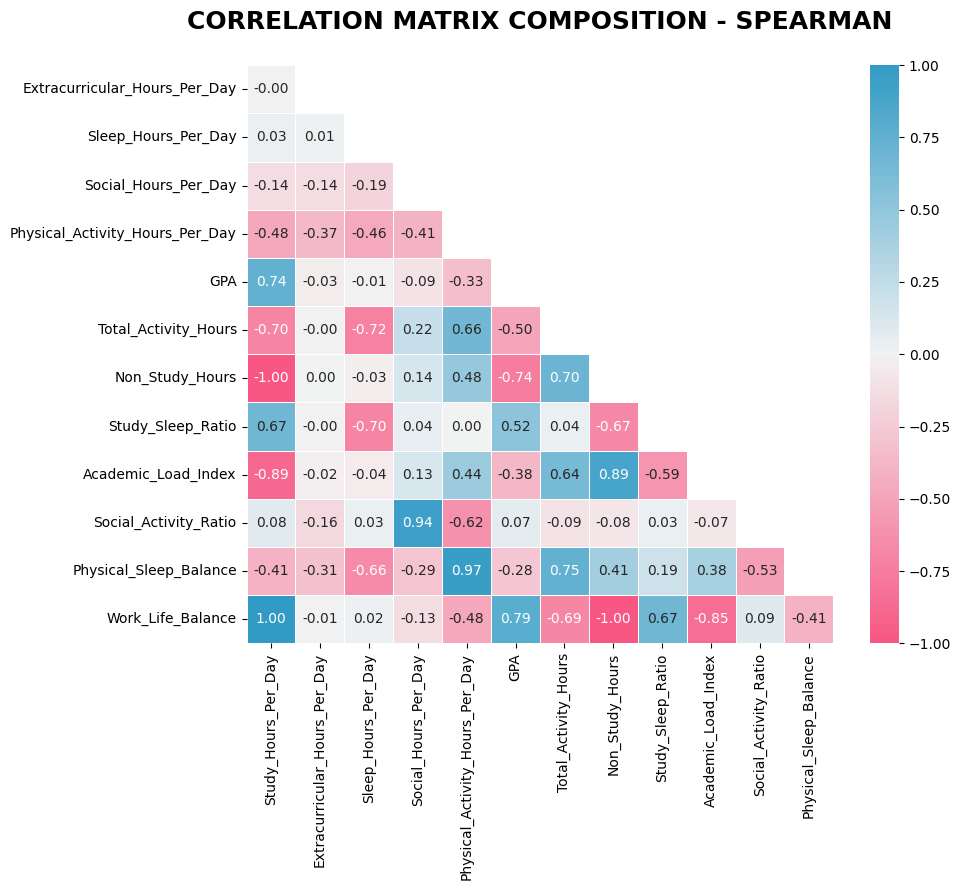

In [193]:
corr_matrix = df_student.drop(columns=["Stress_Level", "High_Stress_Risk_Flag"], axis=1).corr(numeric_only=True, method="spearman")
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION - SPEARMAN\n"
ax.set_title(title, loc="center", fontsize=18, weight="bold");
plt.tight_layout()
plt.show()

**Overview Analysis: Correlation Matrix (Spearman)**

**1. Strong Positive Correlations**

* **Study\_Hours ↔ GPA (+0.74)** → More study hours are associated with higher GPA.
* **Social\_Activity\_Ratio ↔ Social\_Hours (+0.94)** → A higher proportion of social activities almost directly reflects more social interaction time (near-duplicate information).
* **Physical\_Sleep\_Balance ↔ Sleep\_Hours (+0.97)** → Sleep duration strongly determines the balance between physical activity and sleep.
* **Work\_Life\_Balance ↔ Academic\_Load\_Index (+0.89)** → Students with higher study efficiency (GPA per study hour) tend to achieve better work-life balance.

**2. Strong Negative Correlations**

* **Study\_Hours ↔ Non\_Study\_Hours (-1.00)** → Perfect trade-off: more study time means less non-study time.
* **Academic\_Load\_Index ↔ Study\_Hours (-0.89)** → Studying excessively does not guarantee higher efficiency, showing “diminishing returns.”
* **Work\_Life\_Balance ↔ Physical\_Sleep\_Balance (-0.85)** → A higher academic balance often comes at the cost of reduced sleep and physical activity.
* **Social\_Activity\_Ratio ↔ Total\_Activity\_Hours (-0.62)** → When social activities dominate, other activities (physical, extracurricular, sleep) decrease.

**3. Moderate Relationships**

* **Study\_Sleep\_Ratio ↔ Study\_Hours (+0.67)** → More study hours moderately increase the Study/Sleep ratio.
* **Total\_Activity\_Hours ↔ GPA (+0.66)** → Students who engage in more total activities (sleep, social, extracurricular, physical) tend to have higher GPA, though not as strongly as study hours alone.
* **Non\_Study\_Hours ↔ GPA (-0.74)** → Spending more time on non-study activities is associated with lower GPA.

**4. Multicollinearity Concerns**

* Pairs with very high correlation (>|0.85|):

  * Study vs Non\_Study (-1.00)
  * Social vs Social\_Activity\_Ratio (+0.94)
  * Sleep vs Physical\_Sleep\_Balance (+0.97)
  * Academic\_Load\_Index vs Work\_Life\_Balance (+0.89)
    👉 These variables are near-duplicates and may cause multicollinearity if included together in linear models.

**Key Insights**

* **Clear trade-offs**: More study hours increase GPA, but reduce efficiency (Academic\_Load\_Index), sleep, and non-study time.
* **Work-Life Balance** and **Academic Load Index** act as strong composite features, effectively capturing the trade-off between academics and well-being.
* **Some features are redundant**: Social\_Activity\_Ratio, Physical\_Sleep\_Balance, and Non\_Study\_Hours overlap strongly with their base variables → careful feature selection is needed before modeling.

,Stress_Level,Count,Mean,Median,Std
1,Low,297,10.461616,10.400000,1.256661
2,Moderate,674,9.082789,9.200000,1.301651
0,High,1029,8.568513,8.200000,2.436820


🔎 D’Agostino and Pearson Normality Test for 'Total_Activity_Hours' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 29.085
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 103.119
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 244.319
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Total_Activity_Hours ~ Stress_Level
Kruskal-Wallis H-statistic: 212.126
p-value: 8.65825062563027e-47
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                  High           Low      Moderate
High      1.000000e+00  2.058020e-47  7.727337e-07
Low       2.058020e-47  1.000000e+00  1.934207e-23
Moderate  7.727337e-07  1.934207e-23  1.000000e+00


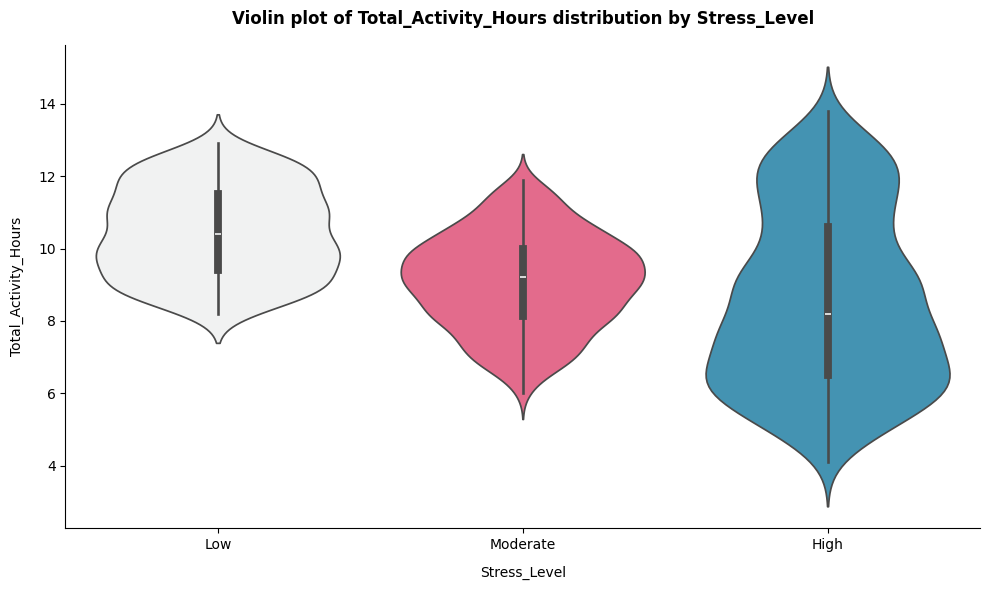

,Stress_Level,Count,Mean,Median,Std
1,Low,297,18.525589,18.500000,0.279753
2,Moderate,674,17.030415,17.000000,0.597576
0,High,1029,15.614966,15.300000,1.238311


🔎 D’Agostino and Pearson Normality Test for 'Non_Study_Hours' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 364.887
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 167.024
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 119.854
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Non_Study_Hours ~ Stress_Level
Kruskal-Wallis H-statistic: 1093.113
p-value: 4.300925497042487e-238
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                   High            Low      Moderate
High       1.000000e+00  5.420462e-213  1.507459e-86
Low       5.420462e-213   1.000000e+00  3.426747e-53
Moderate   1.507459e-86   3.426747e-53  1.000000e+00


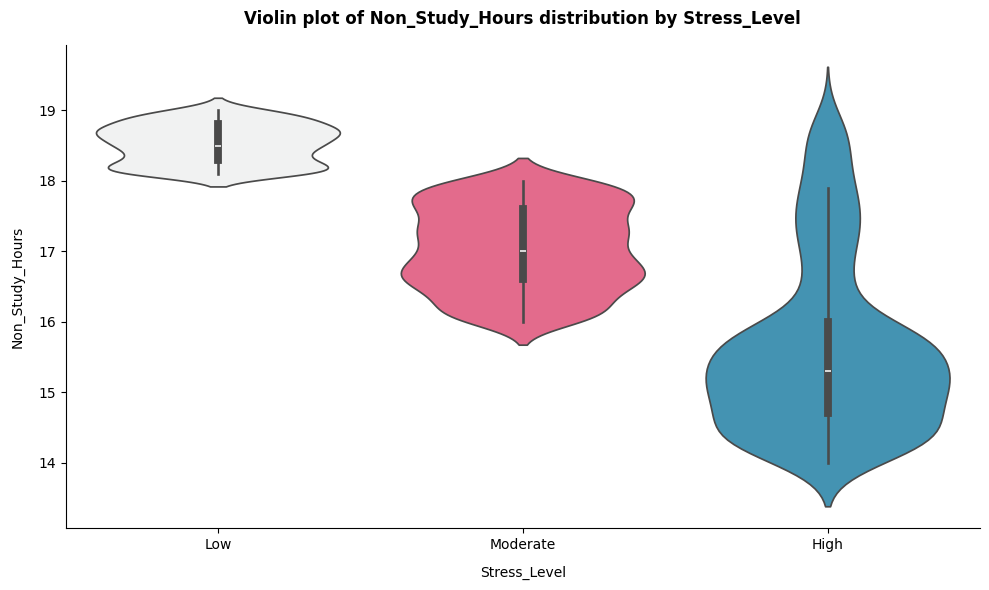

,Stress_Level,Count,Mean,Median,Std
0,High,1029,1.225886,1.191176,0.238482
2,Moderate,674,0.896656,0.880476,0.156431
1,Low,297,0.694469,0.675325,0.111422


🔎 D’Agostino and Pearson Normality Test for 'Study_Sleep_Ratio' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 32.556
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 33.046
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 60.699
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Study_Sleep_Ratio ~ Stress_Level
Kruskal-Wallis H-statistic: 1163.966
p-value: 1.769793132582845e-253
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                   High            Low       Moderate
High       1.000000e+00  7.435717e-200  2.454241e-128
Low       7.435717e-200   1.000000e+00   1.560265e-29
Moderate  2.454241e-128   1.560265e-29   1.000000e+00


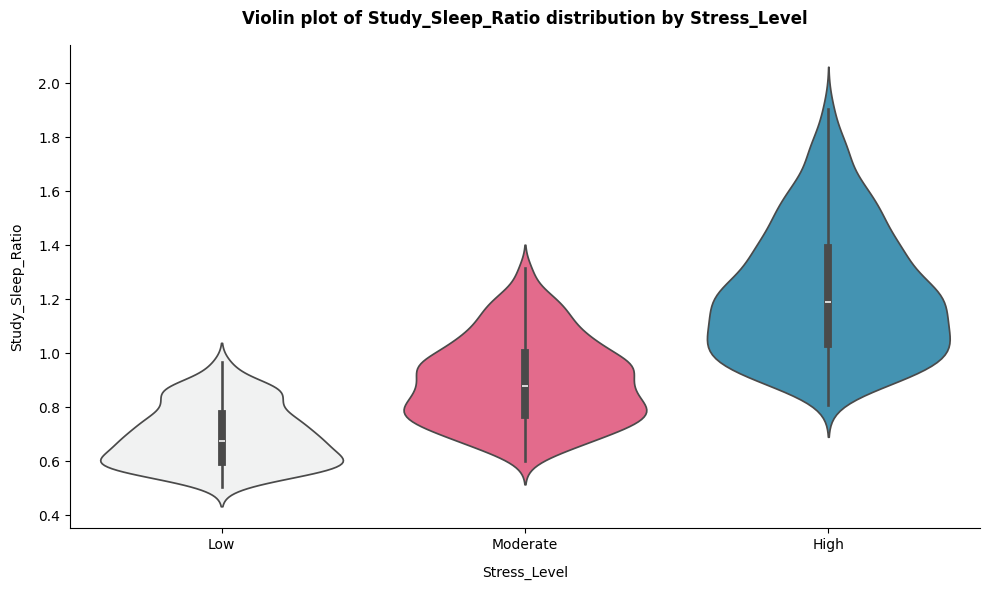

,Stress_Level,Count,Mean,Median,Std
1,Low,297,0.515493,0.510909,0.043194
2,Moderate,674,0.436108,0.435028,0.038112
0,High,1029,0.395407,0.384091,0.050297


🔎 D’Agostino and Pearson Normality Test for 'Academic_Load_Index' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 2.916
  p-value   : 0.23271
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 17.656
  p-value   : 0.00015
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 189.289
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Academic_Load_Index ~ Stress_Level
Kruskal-Wallis H-statistic: 855.032
p-value: 2.1485573198454103e-186
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                   High            Low      Moderate
High       1.000000e+00  1.204284e-171  1.679539e-60
Low       1.204284e-171   1.000000e+00  1.249197e-48
Moderate   1.679539e-60   1.249197e-48  1.000000e+00


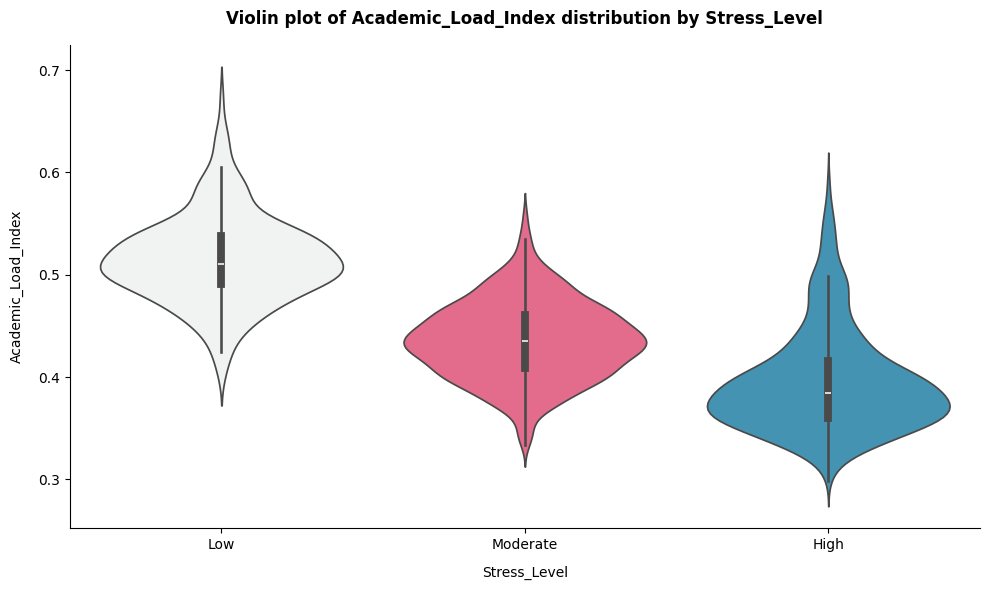

,Stress_Level,Count,Mean,Median,Std
0,High,1029,0.311104,0.301587,0.195977
2,Moderate,674,0.305928,0.292892,0.191876
1,Low,297,0.279774,0.290909,0.165089


🔎 D’Agostino and Pearson Normality Test for 'Social_Activity_Ratio' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 75.660
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 73.771
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 43.915
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Social_Activity_Ratio ~ Stress_Level
Kruskal-Wallis H-statistic: 3.838
p-value: 0.14675304278605159

ℹ️ No significant difference found (p >= 0.05)


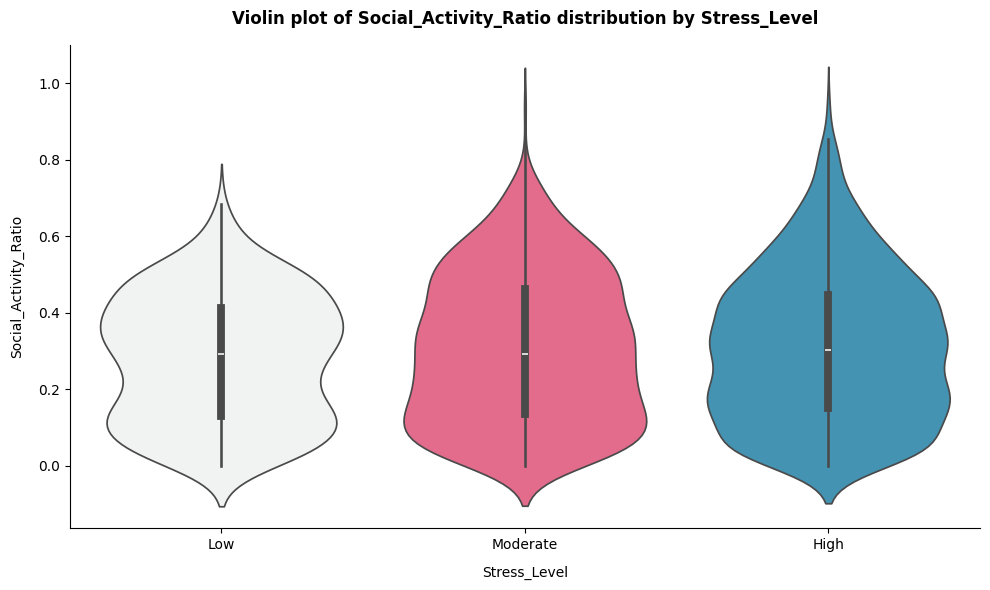

,Stress_Level,Count,Mean,Median,Std
1,Low,297,0.731834,0.670103,0.381594
0,High,1029,0.641056,0.513158,0.502378
2,Moderate,674,0.579051,0.528595,0.346254


🔎 D’Agostino and Pearson Normality Test for 'Physical_Sleep_Balance' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 37.254
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 21.038
  p-value   : 0.00003
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 101.677
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Physical_Sleep_Balance ~ Stress_Level
Kruskal-Wallis H-statistic: 32.325
p-value: 9.56507002511082e-08
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                  High           Low      Moderate
High      1.000000e+00  2.556172e-07  1.000000e+00
Low       2.556172e-07  1.000000e+00  5.173164e-07
Moderate  1.000000e+00  5.173164e-07  1.000000e+00


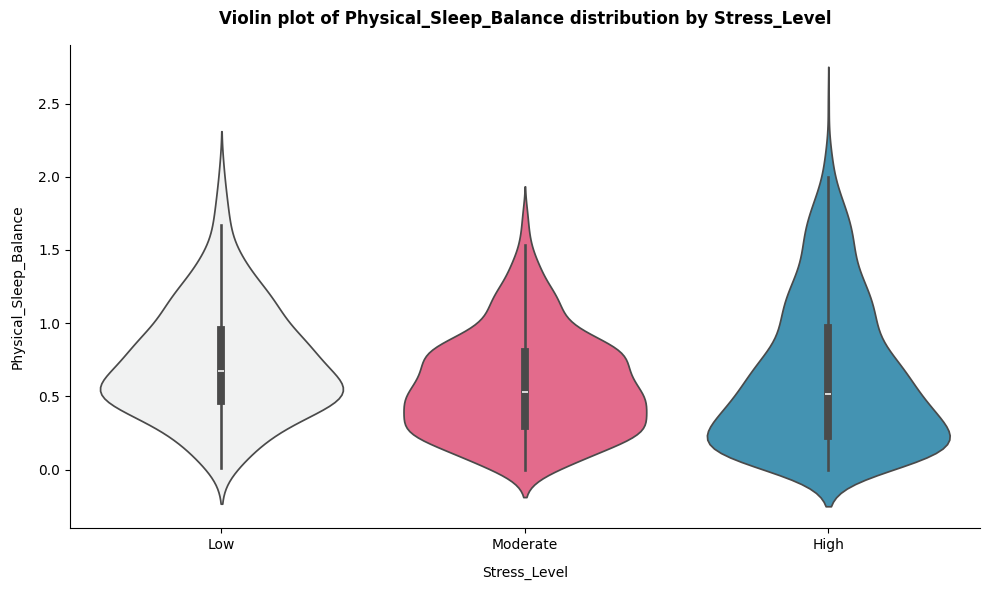

,Stress_Level,Count,Mean,Median,Std
0,High,1029,0.757091,0.782895,0.142447
2,Moderate,674,0.588997,0.588921,0.062221
1,Low,297,0.447923,0.447027,0.026756


🔎 D’Agostino and Pearson Normality Test for 'Work_Life_Balance' across 'Stress_Level' groups

 Group: Moderate (n = 674)
  Statistic : 202.628
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low (n = 297)
  Statistic : 68.920
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 1029)
  Statistic : 78.945
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Work_Life_Balance ~ Stress_Level
Kruskal-Wallis H-statistic: 1088.528
p-value: 4.2583745533190526e-237
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                   High            Low      Moderate
High       1.000000e+00  2.541689e-211  2.186866e-87
Low       2.541689e-211   1.000000e+00  5.998156e-52
Moderate   2.186866e-87   5.998156e-52  1.000000e+00


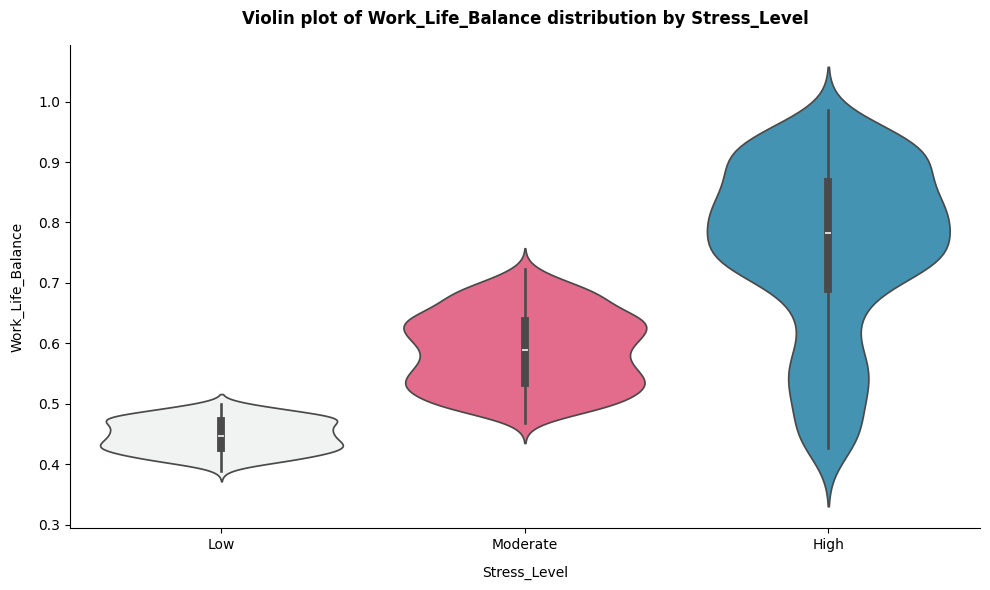

In [194]:
new_features = ["Total_Activity_Hours", "Non_Study_Hours", "Study_Sleep_Ratio", "Academic_Load_Index", 
                "Social_Activity_Ratio", "Physical_Sleep_Balance", "Work_Life_Balance"]
for feature in new_features:
    plot_numerical_distribution_by_target_feature(feature=feature)

`Total_Activity_Hours`

* **Low-stress students spend the highest total activity time (\~10.5h/day)**.
* **High-stress students spend the least total activity time (\~8.6h/day)**, with the greatest variability.
* Total\_Activity\_Hours effectively reflects the **imbalance between activities and study** as stress levels increase.

`Non_Study_Hours`

* **Low-stress students spend the most time on non-study activities (\~18.5h/day)**.
* **High-stress students spend the least (\~15.6h/day)**.
* **Non\_Study\_Hours is one of the strongest features to distinguish stress levels**, clearly reflecting the trade-off between studying and personal life time.

`Study_Sleep_Ratio`

* **Low-stress students**: maintain better balance, sleeping more relative to studying.
* **High-stress students**: have a study/sleep ratio above 1 (more study than sleep), reflecting a major trade-off between academics and health.
* **Study\_Sleep\_Ratio is a very strong feature for distinguishing stress levels**, clearly illustrating the direct link between academic pressure and reduced rest quality.

`Academic_Load_Index`

* **Low-stress students** have a higher Academic Load Index (\~0.52), meaning study takes a reasonable share of overall activities.
* **High-stress students** have the lowest index (\~0.40), indicating that study dominates, leading to imbalance with non-study activities.
* **Academic\_Load\_Index is an important feature for distinguishing stress levels**, directly reflecting the imbalance between study and non-study activities.

`Social_Activity_Ratio`

* **Social\_Activity\_Ratio is not a strong differentiating factor across stress levels**.
* While slight variations exist between groups, the differences are not statistically meaningful to establish a direct relationship.

`Physical_Sleep_Balance`

* **Students with low stress maintain the best physical-sleep balance**, which helps reduce stress risk.
* **Moderate and High stress groups exhibit notable imbalance**, with lower medians compared to the Low group.
* This supports the hypothesis that **maintaining a balance between physical activity and sleep plays a crucial role in stress management**.

`Work_Life_Balance`

* **All three stress groups differ significantly** in Work-Life Balance.
* The **unexpected pattern** (High stress → highest Work-Life Balance) suggests the metric may not fully align with the real-world definition of work-life balance.
* It may reflect that **students under high stress attempt to balance study and personal life more**, but this “balance” could still come with **greater pressure and mental strain**.
* This highlights the need to interpret Work-Life Balance carefully, as **high balance scores do not necessarily indicate better well-being**.

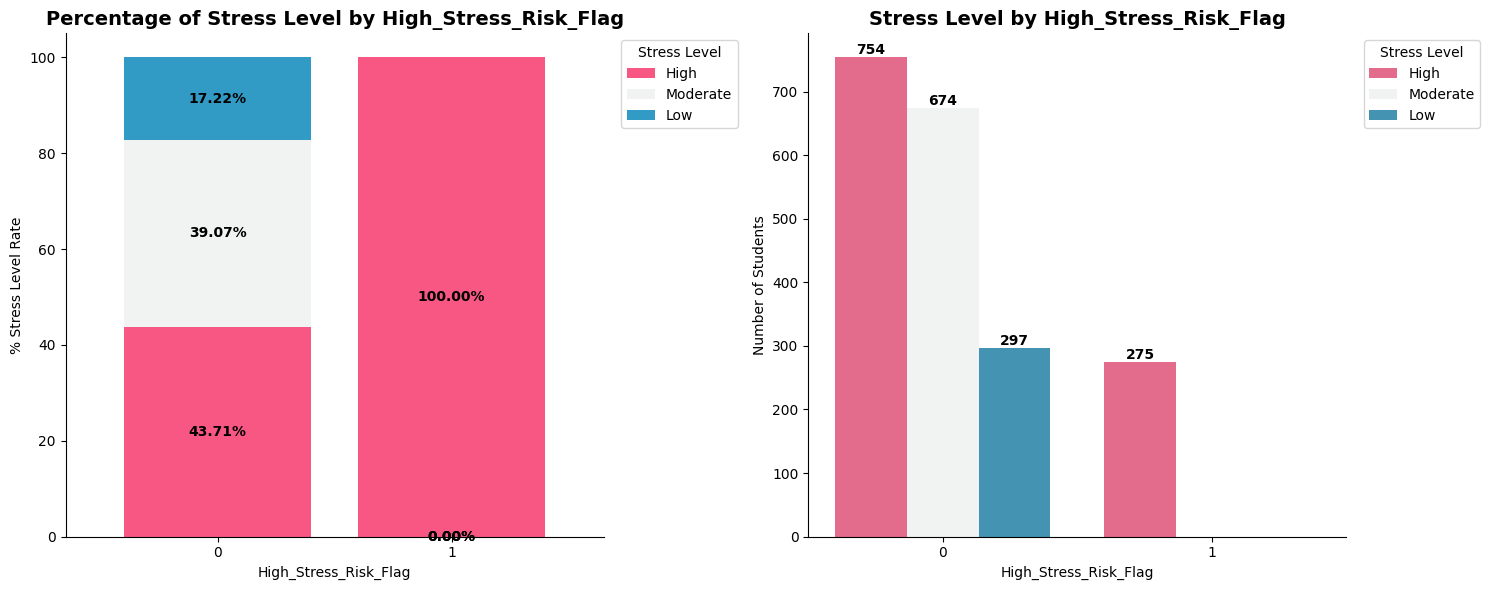


🔍 Chi-Square Test of Independence: 'High_Stress_Risk_Flag' vs. 'Stress_Level'
Chi-squared statistic: 300.869
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'High_Stress_Risk_Flag' and 'Stress_Level'.

Standardized Residuals:
Stress_Level            High   Low  Moderate
High_Stress_Risk_Flag                       
0                      -4.48  2.55      3.84
1                      11.22 -6.39     -9.63


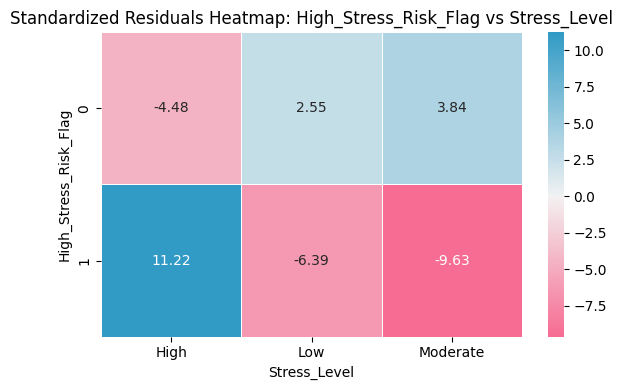

In [195]:
def bivariate_percent_plot(cat, df, figsize=(15, 6), x_order=None, stress_order=("High","Moderate","Low"), rot=0):
    display(HTML(
        f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by Stress Level</b></h2>"
    ))

    # palette
    palette_list = color(n_colors=len(stress_order))
    palette = dict(zip(stress_order, palette_list))

    # data
    grouped = (
        df.groupby([cat, "Stress_Level"], observed=True)
          .size().unstack(fill_value=0)
          .reindex(columns=list(stress_order), fill_value=0)       # ensure columns + order
    )
    if x_order is not None:
        grouped = grouped.reindex(index=x_order)

    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

    # plot
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    for a in ax:
        a.set_facecolor("#ffffff")

    # --- stacked percentage (use list(...) here) ---
    cols = list(stress_order)
    percentages[cols].plot(kind="bar", stacked=True, ax=ax[0], color=[palette[s] for s in cols], width=0.8, edgecolor="none")
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt="%1.2f%%", label_type="center", fontsize=10, weight="bold")

    ax[0].set_title(f"Percentage of Stress Level by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(cat)
    ax[0].set_ylabel("% Stress Level Rate")
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=rot)
    ax[0].legend(cols, title="Stress Level", bbox_to_anchor=(1.02, 1), loc="upper left")
    sns.despine(left=False, bottom=False, ax=ax[0])

    # --- countplot with fixed hue order ---
    sns.countplot(data=df, x=cat, hue="Stress_Level", order=x_order, hue_order=cols, palette=palette, ax=ax[1])
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")

    ax[1].set_title(f"Stress Level by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(cat)
    ax[1].set_ylabel("Number of Students")
    ax[1].legend(title="Stress Level", bbox_to_anchor=(1.02, 1), loc="upper left")
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Stress_Level", df=df, show_residuals=True)

bivariate_percent_plot(cat="High_Stress_Risk_Flag", df=df_student, x_order=[0, 1], stress_order=("High","Moderate","Low"), rot=0)

`High_Stress_Risk_Flag`

* **High\_Stress\_Risk\_Flag is a strong indicator of Stress Level**:

  * If the flag is **ON (1)**, the student is almost certainly in the High Stress group.
  * If the flag is **OFF (0)**, students are more distributed across High, Moderate, and Low stress levels.

| Feature                                 | Type        | Statistical Test Used        | Relationship with Stress Level | Summary                                                                                                     |
| --------------------------------------- | ----------- | ---------------------------- | ------------------------------ | ----------------------------------------------------------------------------------------------------------- |
| **Study\_Hours\_Per\_Day**              | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | Students with **higher stress study significantly more hours** per day (High > Moderate > Low).             |
| **Extracurricular\_Hours\_Per\_Day**    | Numerical   | Kruskal–Wallis               | Not Significant                | **No meaningful difference** in extracurricular time across stress groups (\~2h/day for all).               |
| **Sleep\_Hours\_Per\_Day**              | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **High-stress students sleep less** (mean \~7h) compared to low/moderate groups (\~8h).                     |
| **Physical\_Activity\_Hours\_Per\_Day** | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **Low-stress students are more physically active** (\~5.6h) than high-stress students (\~4h).               |
| **Social\_Hours\_Per\_Day**             | Numerical   | Kruskal–Wallis + Dunn’s Test | Weakly Significant             | **Slight differences**: low-stress students socialize a bit more than high-stress students (p \~0.048).     |
| **GPA**                                 | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **Higher stress is associated with higher GPA** (High \~3.26 > Moderate \~3.02 > Low \~2.82).               |
| **Total\_Activity\_Hours**              | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **Low-stress group has the highest total activity time** (>10h), High-stress the lowest (\~8.6h).           |
| **Non\_Study\_Hours**                   | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **High-stress students spend fewer non-study hours** (\~15.6h) than low-stress students (\~18.5h).          |
| **Study\_Sleep\_Ratio**                 | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **Higher stress → higher Study/Sleep ratio** (High \~1.22 > Moderate \~0.89 > Low \~0.69).                  |
| **Academic\_Load\_Index**               | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **High-stress students bear heavier academic load** (lower index values indicate imbalance).                |
| **Social\_Activity\_Ratio**             | Numerical   | Kruskal–Wallis               | Not Significant                | **No significant difference** across groups — ratio of social time to total activity remains stable.        |
| **Physical\_Sleep\_Balance**            | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **Low-stress students show better physical-sleep balance** than moderate/high-stress groups.                |
| **Work\_Life\_Balance**                 | Numerical   | Kruskal–Wallis + Dunn’s Test | Significant                    | **High-stress students maintain higher WLB index** (possibly due to forced efficiency, but at health cost). |
| **High\_Stress\_Risk\_Flag**            | Categorical | Chi-Square Test              | Significant                    | When the flag = 1, **100% students fall into High Stress group** → a strong indicator of stress level.      |


## Re-checking Skew

In [196]:
num_features = ["Study_Hours_Per_Day", "Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day", "Social_Hours_Per_Day",
                "Physical_Activity_Hours_Per_Day", "GPA", "Total_Activity_Hours", "Non_Study_Hours", "Study_Sleep_Ratio",
                "Academic_Load_Index", "Social_Activity_Ratio", "Physical_Sleep_Balance", "Work_Life_Balance"]
skew_feature, skew_df = check_skewness(data=df_student, numerical_features=num_features)


🔍 Skewness for dataset:
---------------------------------------------------------------------------
Feature                             | Skewness   | Remark
---------------------------------------------------------------------------
Physical_Sleep_Balance              |  +0.866121 | Moderately skewed
Academic_Load_Index                 |  +0.591063 | Moderately skewed
Study_Sleep_Ratio                   |  +0.551807 | Moderately skewed
Physical_Activity_Hours_Per_Day     |  +0.399239 | Approximately symmetric
Social_Activity_Ratio               |  +0.351758 | Approximately symmetric
Work_Life_Balance                   |  +0.250677 | Approximately symmetric
Social_Hours_Per_Day                |  +0.184222 | Approximately symmetric
Total_Activity_Hours                |  -0.037625 | Approximately symmetric
Non_Study_Hours                     |  -0.034988 | Approximately symmetric
Study_Hours_Per_Day                 |  +0.034988 | Approximately symmetric
GPA                              

In [197]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []
    pt_dict          = {}

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            pt_dict[col] = pt
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed, pt_dict

In [198]:
processed_df, transformed_columns, sparse_columns, skewed_columns, pt_dict_train = handle_skewed_features(df=df_student, num_features=skew_feature)
num_features = ["Study_Hours_Per_Day", "Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day", "Social_Hours_Per_Day",
                "Physical_Activity_Hours_Per_Day", "GPA", "Total_Activity_Hours", "Non_Study_Hours", "PT_Study_Sleep_Ratio",
                "PT_Academic_Load_Index", "Social_Activity_Ratio", "PT_Physical_Sleep_Balance", "Work_Life_Balance"]
skew_feature, skew_df = check_skewness(data=processed_df, numerical_features=num_features)


🔍 Skewness for dataset:
---------------------------------------------------------------------------
Feature                             | Skewness   | Remark
---------------------------------------------------------------------------
Physical_Activity_Hours_Per_Day     |  +0.399239 | Approximately symmetric
Social_Activity_Ratio               |  +0.351758 | Approximately symmetric
Work_Life_Balance                   |  +0.250677 | Approximately symmetric
Social_Hours_Per_Day                |  +0.184222 | Approximately symmetric
PT_Academic_Load_Index              |  +0.051629 | Approximately symmetric
PT_Physical_Sleep_Balance           |  +0.040290 | Approximately symmetric
Total_Activity_Hours                |  -0.037625 | Approximately symmetric
Non_Study_Hours                     |  -0.034988 | Approximately symmetric
Study_Hours_Per_Day                 |  +0.034988 | Approximately symmetric
GPA                                 |  +0.027516 | Approximately symmetric
PT_Study_Sleep_

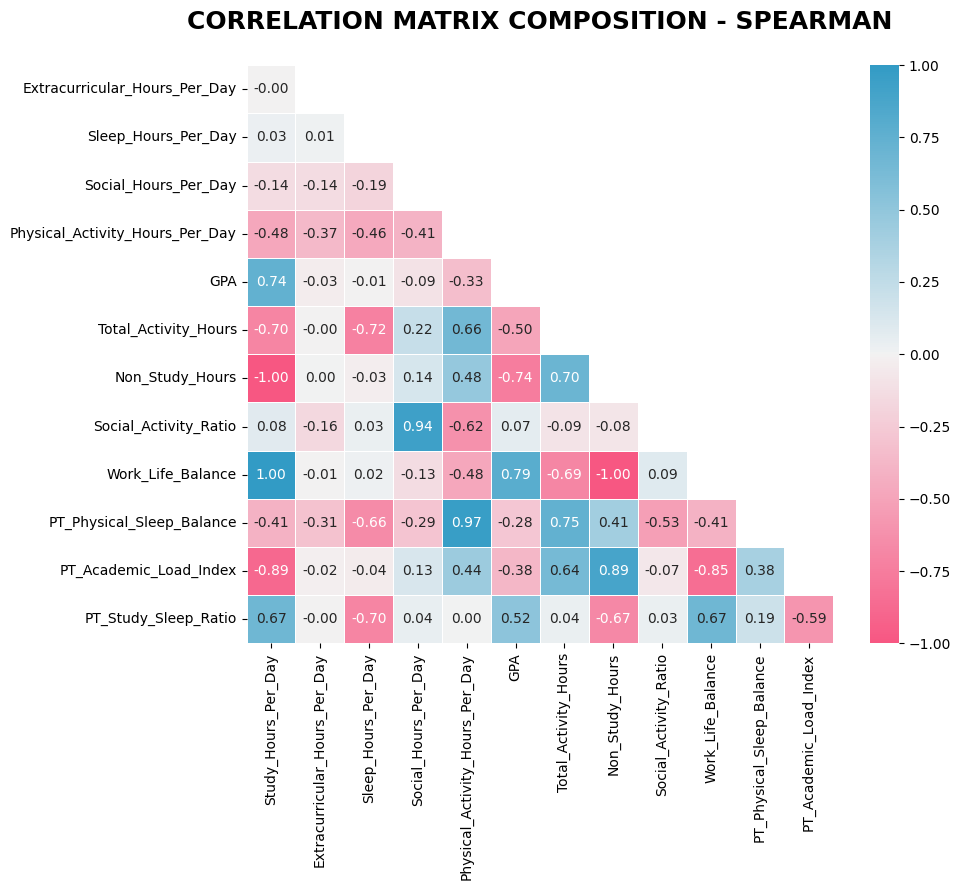

In [199]:
corr_matrix = processed_df.drop(columns=["Stress_Level", "High_Stress_Risk_Flag"], axis=1).corr(numeric_only=True, method="spearman")
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION - SPEARMAN\n"
ax.set_title(title, loc="center", fontsize=18, weight="bold");
plt.tight_layout()
plt.show()

**Observations from the Skewness Table (`processed_df`):**

**Approximately Symmetric**:

* Several features, such as:

  * `PT_Academic_Load_Index`, `PT_Study_Sleep_Ratio` and `PT_Physical_Sleep_Balance` less than 0.5.
  * This indicates that **Yeo-Johnson transformation was effective** for these features.

## Re-check Outliers

In [200]:
checking_outlier(list_feature=num_features, df=processed_df, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,Physical_Activity_Hours_Per_Day,5
1,GPA,4
2,Social_Activity_Ratio,3


**RobustScaler** is typically useful when:

* The data has **many outliers** or the outliers are extremely large (heavy-tailed).
* The feature distribution is highly skewed, which can strongly affect linear or distance-based models (like SVM, KNN).

In your case:

* `Physical_Activity_Hours_Per_Day` has only **5 outliers**,
* `GPA` has **4 outliers**,
* `Social_Activity_Ratio` has **3 outliers**.

The total number of outliers is quite small compared to the dataset (around 2000+ samples). <br>
With such a small number, you generally **don’t need RobustScaler**.

* You can keep using **StandardScaler** or **MinMaxScaler**.

**Conclusion**: In this situation, you **don’t necessarily need RobustScaler**. StandardScaler is still fine since outliers are not dominant.

## Create Test Set

🔴 Suppose you chatted with experts who told you that the **Study_Hours_Per_Day** is a very important attribute to predict **Stress_Level**. <br>
🔴 We may want to ensure that the test set is representative of the various categories of study hours per day in the whole dataset. Since the study hours per day is a continuous numerical attribute, we first need to create an category attribute.

In [201]:
# Create mapping in the desired order
mapping = {"Low": 0, "Moderate": 1, "High": 2}

# Apply mapping
processed_df["Stress_Level"] = processed_df["Stress_Level"].map(mapping)

processed_df["Stress_Level"].value_counts()

Stress_Level
2    1029
1     674
0     297
Name: count, dtype: int64

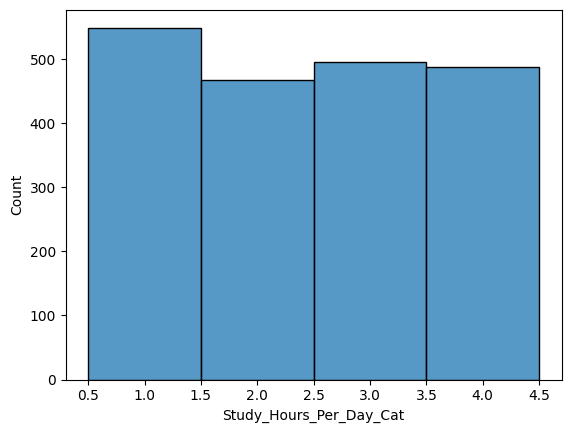

In [202]:
processed_df["Study_Hours_Per_Day_Cat"] = pd.qcut(processed_df["Study_Hours_Per_Day"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

sns.histplot(data=processed_df["Study_Hours_Per_Day_Cat"]);

In [203]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_df, processed_df["Study_Hours_Per_Day_Cat"]):
    start_train_set = processed_df.loc[train_index]
    start_test_set = processed_df.loc[test_index]

In [204]:
# Now we should remove the Study_Hours_Per_Day_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("Study_Hours_Per_Day_Cat", axis=1, inplace=True)

## Scale and Encode

In [205]:
df_student_new = start_train_set.drop("Stress_Level", axis=1)
df_student_label = start_train_set["Stress_Level"].copy()

In [206]:
cat_features = ["High_Stress_Risk_Flag"]

# There are no **missing values** into dataset. But we will still handle missing values ​​to check the data in the future.
num_transfomer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transfomer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transfomer, num_features),
        ("cat", cat_transfomer, cat_features),
    ]
)

preprocessor.fit(df_student_new)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Study_Hours_Per_Day',
                                  'Extracurricular_Hours_Per_Day',
                                  'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                                  'Physical_Activity_Hours_Per_Day', 'GPA',
                                  'Total_Activity_Hours', 'Non_Study_Hours',
                                  'PT_Study_Sleep_Ratio',
                                  'PT_Academic_Load_Index',
                                  'Social_Activity_Ratio',
                                  'PT_Physical_Sleep_Balance',
                                  'Work_Life_Balance']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['High_Stress_Risk_Flag'])])

In [207]:
df_student_new_prepared = preprocessor.transform(df_student_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num__Study_Hours_Per_Day',
 'num__Extracurricular_Hours_Per_Day',
 'num__Sleep_Hours_Per_Day',
 'num__Social_Hours_Per_Day',
 'num__Physical_Activity_Hours_Per_Day',
 'num__GPA',
 'num__Total_Activity_Hours',
 'num__Non_Study_Hours',
 'num__PT_Study_Sleep_Ratio',
 'num__PT_Academic_Load_Index',
 'num__Social_Activity_Ratio',
 'num__PT_Physical_Sleep_Balance',
 'num__Work_Life_Balance',
 'cat__High_Stress_Risk_Flag_0',
 'cat__High_Stress_Risk_Flag_1']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [219]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, 
                              AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=seed, class_weight="balanced"),    
    SVC(kernel="rbf", random_state=seed, class_weight="balanced"),
    KNeighborsClassifier(metric="minkowski", p=2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed, class_weight="balanced"),
    DecisionTreeClassifier(max_depth=5, random_state=seed, class_weight="balanced"),
    RandomForestClassifier(n_estimators=100, random_state=seed, class_weight="balanced"),
    ExtraTreesClassifier(random_state=seed, class_weight="balanced"),
    AdaBoostClassifier(random_state=seed),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter, class_weight="balanced"),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold, class_weight="balanced"),
    CatBoostClassifier(verbose=0, random_seed=seed, auto_class_weights="Balanced"),
    BaggingClassifier(random_state=seed),
    HistGradientBoostingClassifier(random_state=seed, class_weight="balanced", max_iter=max_iter)
]

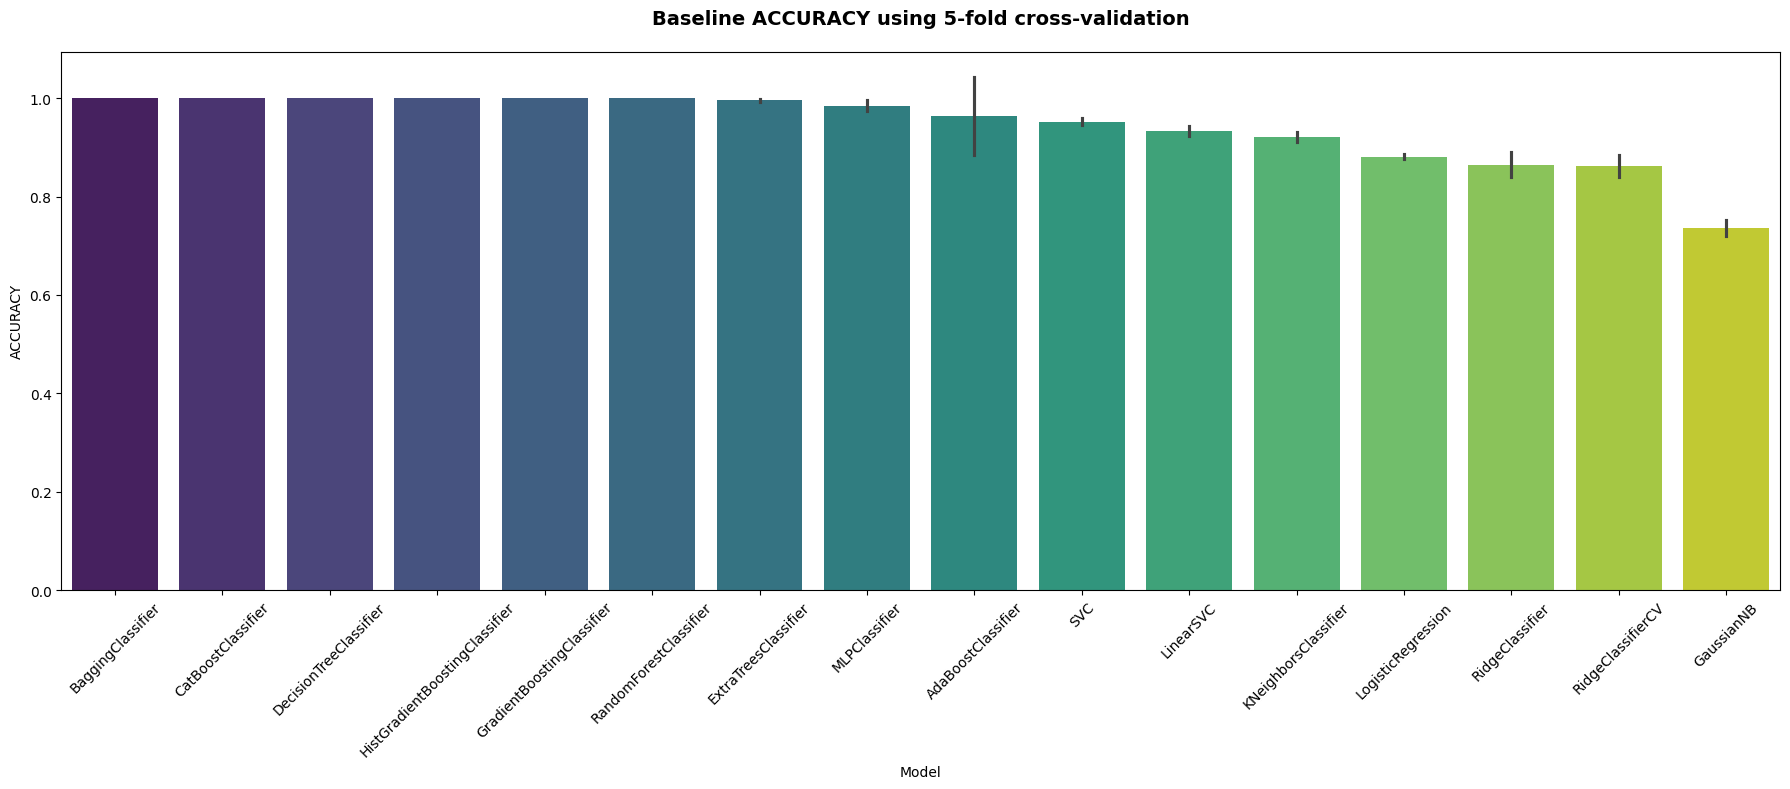

,Mean,Std,N
model_name,,,
BaggingClassifier,1.000000,0.000000,5
CatBoostClassifier,1.000000,0.000000,5
DecisionTreeClassifier,1.000000,0.000000,5
HistGradientBoostingClassifier,1.000000,0.000000,5
GradientBoostingClassifier,1.000000,0.000000,5
RandomForestClassifier,1.000000,0.000000,5
ExtraTreesClassifier,0.995625,0.002795,5
MLPClassifier,0.985000,0.010458,5
AdaBoostClassifier,0.963125,0.078977,5


In [223]:
def generate_baseline_results(models=models, X=df_student_new_prepared, y=df_student_label,
                              metric="accuracy", cv=kfold, plot_result=False):
    entries = []
    for model in models:
        model_name = getattr(model, "name", model.__class__.__name__)
        scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, s in enumerate(scores, start=1):
            entries.append((model_name, fold_idx, s))

    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "score"])

    summary = (cv_df.groupby("model_name")["score"]
                    .agg(Mean="mean", Std="std", N="size")
                    .sort_values("Mean", ascending=False))

    if plot_result:
        order = summary.index.tolist()
        plt.figure(figsize=(18, 8))
        sns.barplot(data=cv_df, x="model_name", y="score", order=order, errorbar=("sd"), palette="viridis")
        title_metric = metric.upper() if isinstance(metric, str) else "Score"
        nfolds = getattr(cv, "n_splits", "CV")
        plt.title(f"Baseline {title_metric} using {nfolds}-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model"); plt.ylabel(title_metric)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return summary

generate_baseline_results(plot_result = True)

We will evaluate some models `CatBoostClassifier`, `HistGradientBoostingClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`

In [214]:
def shap_plot(model, X_test, list_feature, type = None):
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance", fontsize=14, weight="bold", pad=20)
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

def _get_scores(estimator, X):
    """
    Get 'y_score' for plotting curves:
      - If predict_proba exists -> use probabilities.
      - If not -> use decision_function (if available).
    Returns:
      y_score: ndarray of shape (n_samples, n_classes) for multiclass
               or (n_samples,) for binary if the model only outputs one column.
    """
    if hasattr(estimator, "predict_proba"):
        y_score = estimator.predict_proba(X)
        return y_score
    elif hasattr(estimator, "decision_function"):
        return estimator.decision_function(X)
    else:
        raise ValueError("Estimator does not support predict_proba or decision_function.")

def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize=(15, 6)):
    """
    Visualization layout:
    - [0,0]: ROC (Binary or Multiclass OvR: micro + selected classes)
    - [0,1]: Confusion Matrix
    - [1,0]: Precision-Recall (Binary or Multiclass OvR: micro + selected classes)
    - [1,1]: hidden
    Returns: metrics dict (roc_auc_macro, pr_auc_macro, accuracy)
    """
    y_pred = estimator.predict(X_val)
    classes = np.array(sorted(np.unique(y_val)))
    n_classes = len(classes)

    # Normalize y_score
    y_score = _get_scores(estimator, X_val)
    # Reshape to (n_samples, n_classes) for binary if necessary
    if n_classes == 2:
        # Some models return (n_samples,), (n_samples, 1), or (n_samples, 2)
        if y_score.ndim == 1:
            # decision_function binary -> (n_samples,)
            pos_scores = y_score
        elif y_score.ndim == 2 and y_score.shape[1] == 2:
            # predict_proba -> take the positive class column
            pos_scores = y_score[:, 1]
        elif y_score.ndim == 2 and y_score.shape[1] == 1:
            pos_scores = y_score[:, 0]
        else:
            # Fallback: take the last column
            pos_scores = y_score[:, -1]
    else:
        # Multiclass: ensure y_score has shape (n_samples, n_classes)
        if y_score.ndim == 1:
            raise ValueError("Multiclass requires y_score with 2 dimensions (n_samples, n_classes).")
        # If the model’s class order differs from np.unique(y_val), reorder if estimator.classes_ exists
        if hasattr(estimator, "classes_"):
            # Reorder columns to match np.unique(y_val) order used for binarization
            order = [np.where(estimator.classes_ == c)[0][0] for c in classes]
            y_score = y_score[:, order]

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)

    # ===== (1) ROC =====
    if n_classes == 2:
        fpr, tpr, _ = roc_curve(y_val, pos_scores, pos_label=classes.max())
        roc_auc = roc_auc_score(y_val, pos_scores)
        ax[0, 0].plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        ax[0, 0].plot([0, 1], [0, 1], linestyle="--")
        ax[0, 0].set_title("ROC curve (Binary)", fontsize=13, weight="bold", pad=14)
        ax[0, 0].set_xlabel("False Positive Rate")
        ax[0, 0].set_ylabel("True Positive Rate")
        ax[0, 0].legend(loc="lower right")
        roc_auc_macro = float(roc_auc)
    else:
        # One-vs-Rest
        y_val_bin = label_binarize(y_val, classes=classes)  # (n_samples, n_classes)
        fpr, tpr, roc_auc = {}, {}, {}

        # per-class
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # micro-average
        fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # macro-average
        roc_auc_macro = float(np.mean([roc_auc[i] for i in range(n_classes)]))

        # Plot micro + 3 representative classes (if >=3): min, median, max by AUC
        ax[0, 0].plot(fpr["micro"], tpr["micro"], label=f"micro-average AUC = {roc_auc['micro']:.3f}")
        order = np.argsort([roc_auc[i] for i in range(n_classes)])
        if n_classes >= 3:
            picks = [order[0], order[n_classes // 2], order[-1]]
        else:
            picks = list(range(n_classes))

        for i in picks:
            ax[0, 0].plot(fpr[i], tpr[i], label=f"class {classes[i]} AUC = {roc_auc[i]:.3f}")

        ax[0, 0].plot([0, 1], [0, 1], linestyle="--")
        ax[0, 0].set_title(f"ROC curve (Multiclass, macro AUC = {roc_auc_macro:.3f})", fontsize=13, weight="bold", pad=14)
        ax[0, 0].set_xlabel("False Positive Rate")
        ax[0, 0].set_ylabel("True Positive Rate")
        ax[0, 0].legend(loc="lower right")

    # ===== (2) Confusion Matrix =====
    cm = confusion_matrix(y_val, y_pred, labels=classes)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1],
                xticklabels=classes, yticklabels=classes)
    ax[0, 1].set_title("Confusion Matrix", fontsize=13, weight="bold", pad=14)
    ax[0, 1].set_xlabel("Predicted")
    ax[0, 1].set_ylabel("Actual")

    # ===== (3) Precision-Recall =====
    if n_classes == 2:
        precision, recall, _ = precision_recall_curve(y_val, pos_scores, pos_label=classes.max())
        pr_auc = auc(recall, precision)
        ax[1, 0].plot(recall, precision, label=f"AUC = {pr_auc:.3f}")
        ax[1, 0].set_title("Precision–Recall (Binary)", fontsize=13, weight="bold", pad=14)
        pr_auc_macro = float(pr_auc)
    else:
        y_val_bin = label_binarize(y_val, classes=classes)
        precision, recall, pr_auc = {}, {}, {}

        # per-class AP/AUPRC
        for i in range(n_classes):
            precision[i], recall[i], _ = precision_recall_curve(y_val_bin[:, i], y_score[:, i])
            pr_auc[i] = auc(recall[i], precision[i])

        # micro-average
        precision["micro"], recall["micro"], _ = precision_recall_curve(y_val_bin.ravel(), y_score.ravel())
        pr_auc["micro"] = auc(recall["micro"], precision["micro"])

        pr_auc_macro = float(np.mean([pr_auc[i] for i in range(n_classes)]))

        # Plot micro + 3 representative classes
        ax[1, 0].plot(recall["micro"], precision["micro"], label=f"micro-average AUC = {pr_auc["micro"]:.3f}")
        order_pr = np.argsort([pr_auc[i] for i in range(n_classes)])
        if n_classes >= 3:
            picks_pr = [order_pr[0], order_pr[n_classes // 2], order_pr[-1]]
        else:
            picks_pr = list(range(n_classes))

        for i in picks_pr:
            ax[1, 0].plot(recall[i], precision[i], label=f"class {classes[i]} AUC = {pr_auc[i]:.3f}")

        ax[1, 0].set_title(f"Precision–Recall (Multiclass, macro AUC = {pr_auc_macro:.3f})", fontsize=13, weight="bold", pad=14)

    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].legend(loc="lower left")

    # ===== (4) Hide last cell =====
    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Print text report
    print(classification_report(y_val, y_pred, digits=3))

    # Aggregate metrics
    metrics = {
        "roc_auc_macro": float(roc_auc_macro),
        "pr_auc_macro": float(pr_auc_macro),
        "accuracy": float(accuracy_score(y_val, y_pred))
    }
    return metrics

In [231]:
# ===== evaluate_model keeps the same API, adds return metrics =====
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize=(15, 6), show_shap_plot=False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    metrics = plot_ROC_confusionMatrix(estimator=model, X_val=X_val, y_val=y_val, figsize=figsize)

    if show_shap_plot:
        try:
            # Limit to 200 samples for faster SHAP computation
            shap_sample = X_val.iloc[:200] if hasattr(X_val, "iloc") else X_val[:200]
            shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)
        except Exception as e:
            print("SHAP plot skipped:", e)

    return metrics

In [224]:
X_val = start_test_set.drop("Stress_Level", axis=1)
y_val = start_test_set["Stress_Level"].copy()
X_val_prepared = preprocessor.transform(X_val)

### CatBoostClassifier

Evaluating CatBoostClassifier...


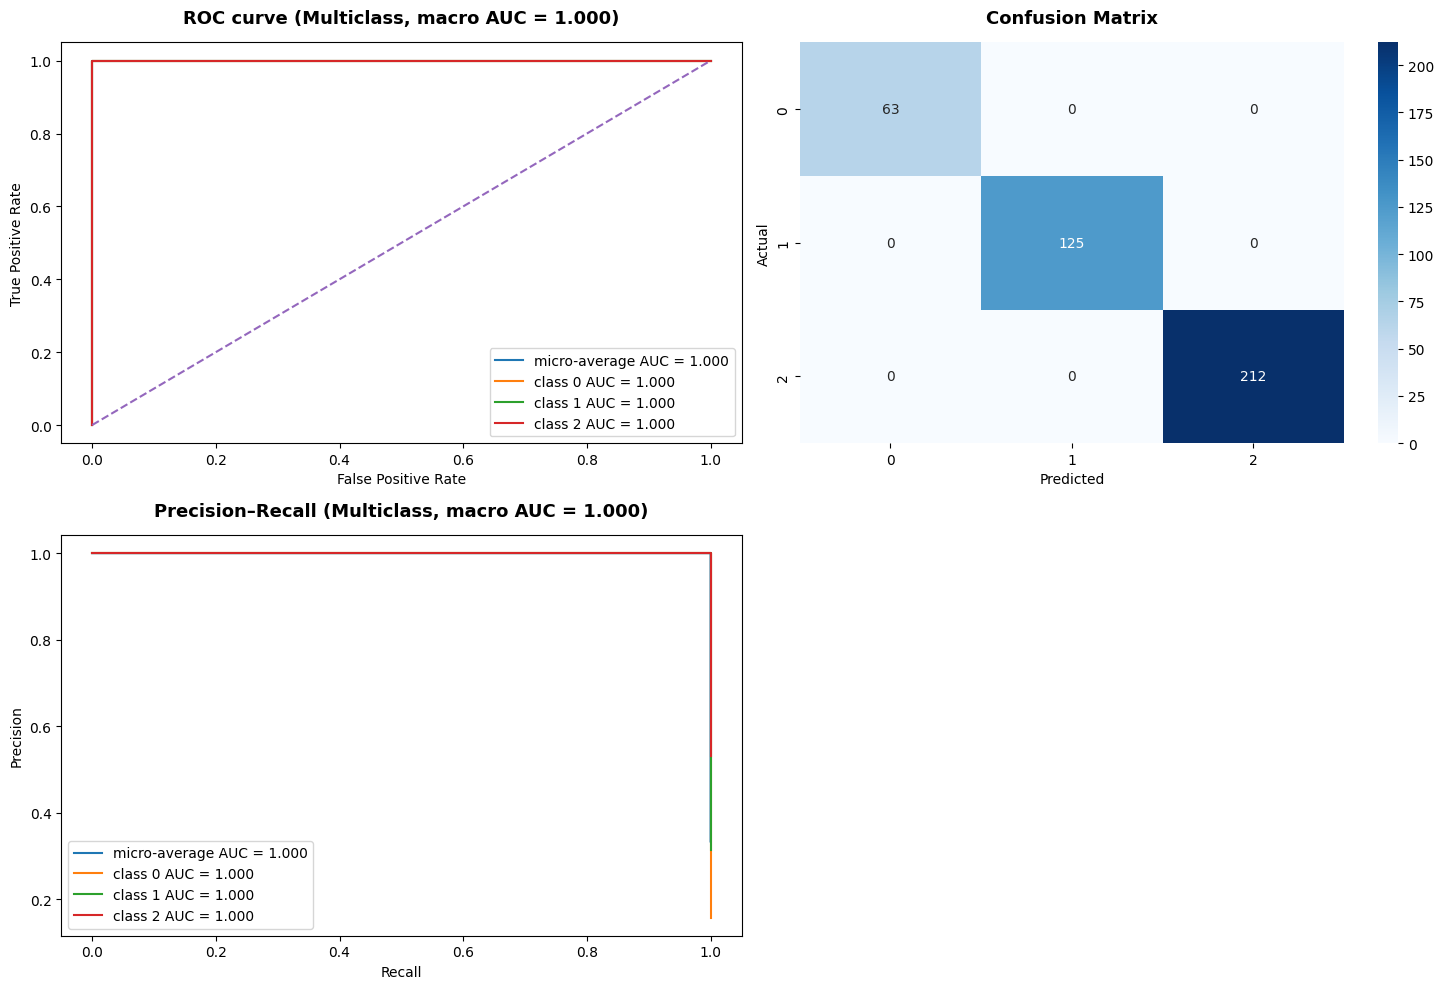

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        63
           1      1.000     1.000     1.000       125
           2      1.000     1.000     1.000       212

    accuracy                          1.000       400
   macro avg      1.000     1.000     1.000       400
weighted avg      1.000     1.000     1.000       400



{'roc_auc_macro': 1.0, 'pr_auc_macro': 1.0, 'accuracy': 1.0}

In [229]:
# Model CatBoostClassifier
model_cb = CatBoostClassifier(verbose=0, random_seed=seed, auto_class_weights="Balanced")

evaluate_model(model = model_cb, X_train=df_student_new_prepared, X_val=X_val_prepared,
                               y_train=df_student_label, y_val=y_val, figsize=(15, 10))

### HistGradientBoostingClassifier

Evaluating HistGradientBoostingClassifier...


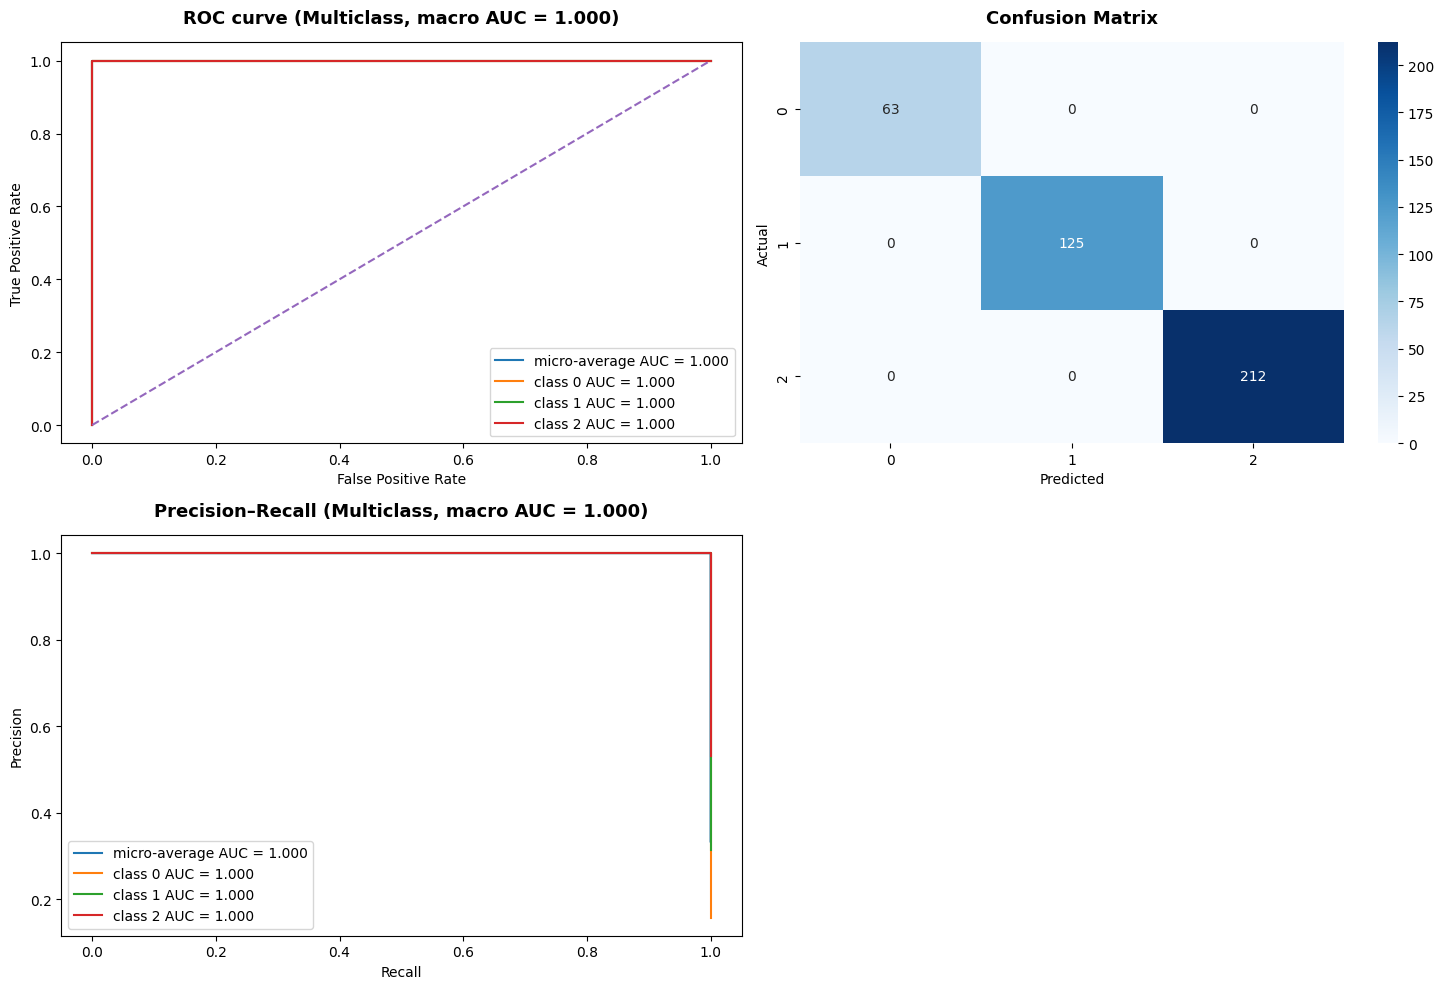

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        63
           1      1.000     1.000     1.000       125
           2      1.000     1.000     1.000       212

    accuracy                          1.000       400
   macro avg      1.000     1.000     1.000       400
weighted avg      1.000     1.000     1.000       400



{'roc_auc_macro': 1.0, 'pr_auc_macro': 1.0, 'accuracy': 1.0}

In [233]:
# Model HistGradientBoostingClassifier
model_hgbc = HistGradientBoostingClassifier(random_state=seed, class_weight="balanced", max_iter=max_iter)

evaluate_model(model = model_hgbc, X_train=df_student_new_prepared, X_val=X_val_prepared,
                               y_train=df_student_label, y_val=y_val, figsize=(15, 10))

### RandomForestClassifier

Evaluating RandomForestClassifier...


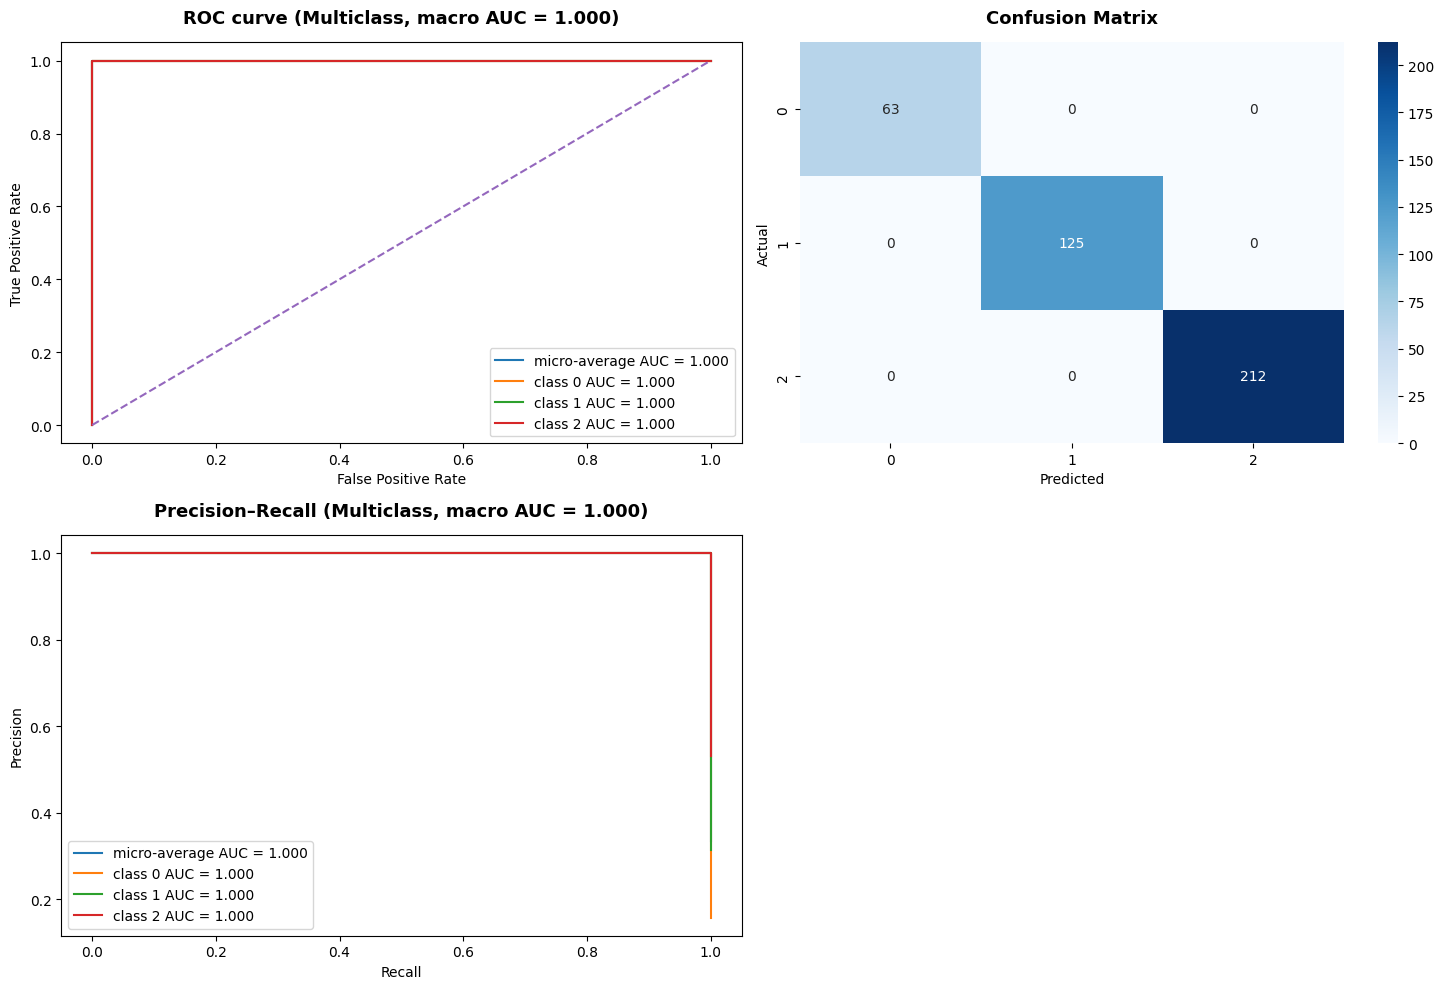

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        63
           1      1.000     1.000     1.000       125
           2      1.000     1.000     1.000       212

    accuracy                          1.000       400
   macro avg      1.000     1.000     1.000       400
weighted avg      1.000     1.000     1.000       400



{'roc_auc_macro': 1.0, 'pr_auc_macro': 1.0, 'accuracy': 1.0}

In [234]:
# Model RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=seed, class_weight="balanced")

evaluate_model(model = model_rf, X_train=df_student_new_prepared, X_val=X_val_prepared,
                               y_train=df_student_label, y_val=y_val, figsize=(15, 10))

### GradientBoostingClassifier

Evaluating GradientBoostingClassifier...


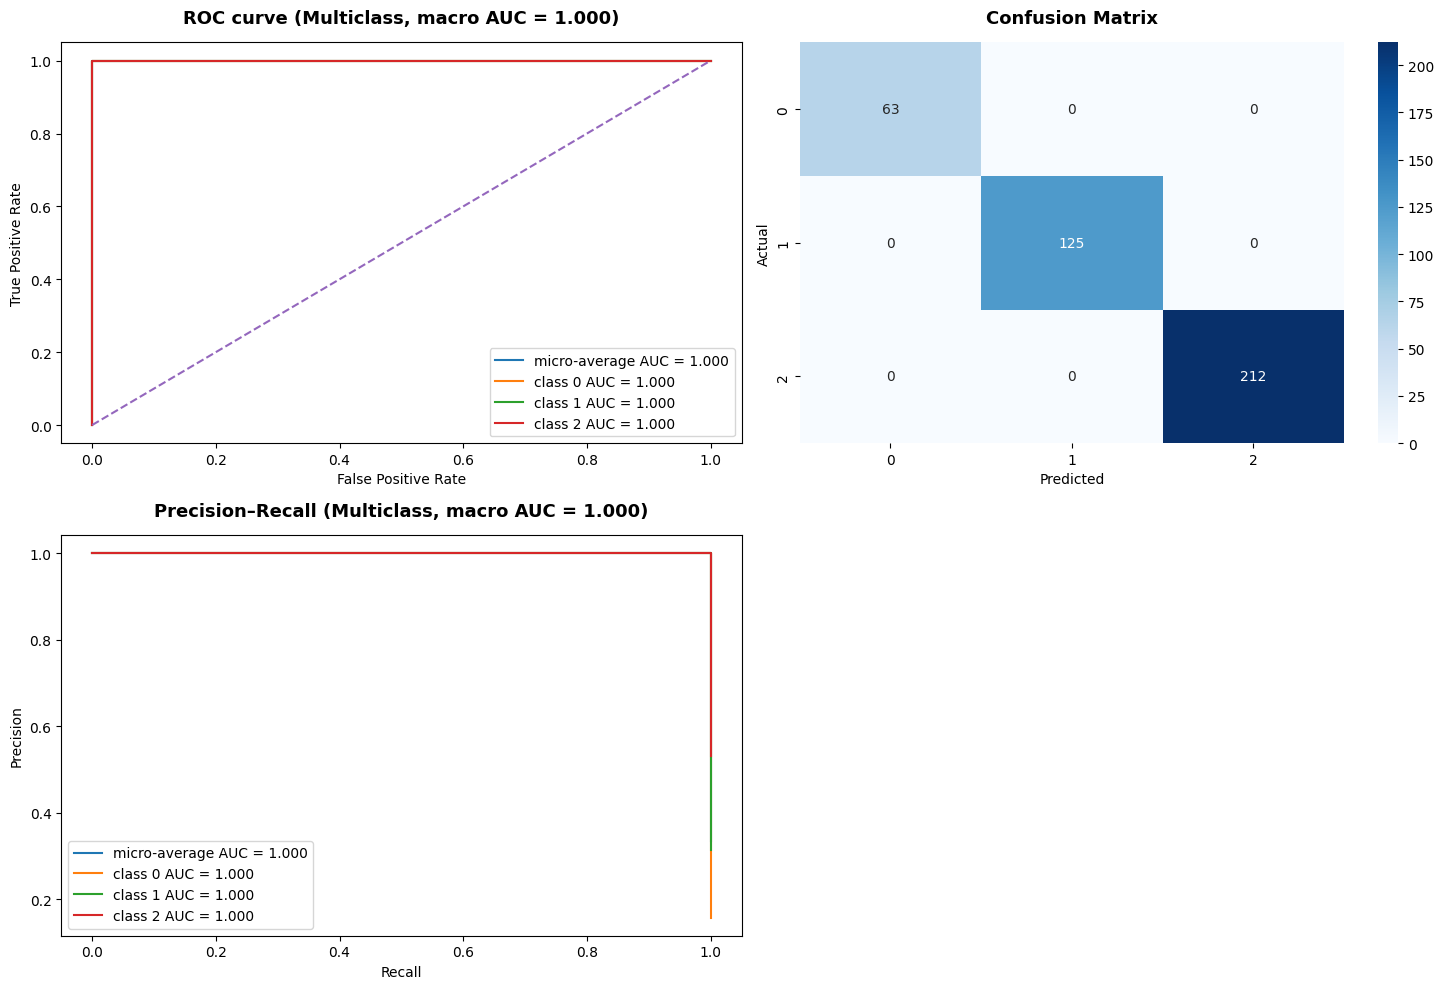

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        63
           1      1.000     1.000     1.000       125
           2      1.000     1.000     1.000       212

    accuracy                          1.000       400
   macro avg      1.000     1.000     1.000       400
weighted avg      1.000     1.000     1.000       400



{'roc_auc_macro': 1.0, 'pr_auc_macro': 1.0, 'accuracy': 1.0}

In [235]:
# GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state=seed)

evaluate_model(model = model_gb, X_train=df_student_new_prepared, X_val=X_val_prepared,
                               y_train=df_student_label, y_val=y_val, figsize=(15, 10))

### VotingClassifier

In [236]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("cb", model_cb),
        ("hgb", model_hgbc),
        ("rf", model_rf),
        ("gb", model_gb)
    ],
    voting="soft",
    weights=[1, 1, 1, 1],
    n_jobs=-1
)

Evaluating VotingClassifier...


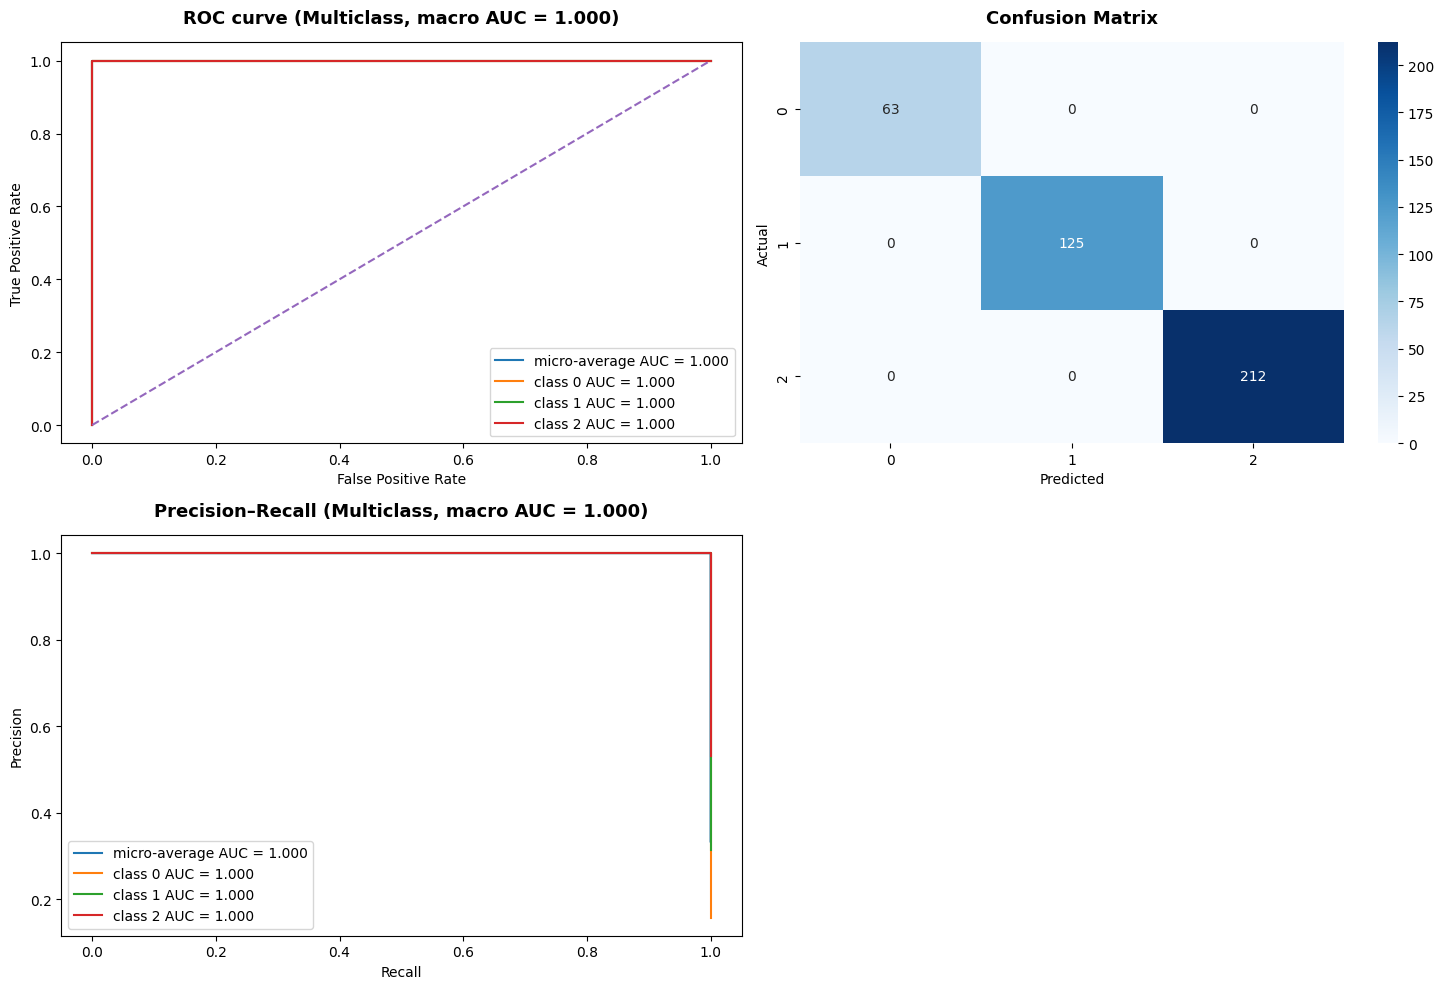

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        63
           1      1.000     1.000     1.000       125
           2      1.000     1.000     1.000       212

    accuracy                          1.000       400
   macro avg      1.000     1.000     1.000       400
weighted avg      1.000     1.000     1.000       400



{'roc_auc_macro': 1.0, 'pr_auc_macro': 1.0, 'accuracy': 1.0}

In [237]:
evaluate_model(model = voting_clf_soft, X_train=df_student_new_prepared, X_val=X_val_prepared,
                               y_train=df_student_label, y_val=y_val, figsize=(15, 10))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>

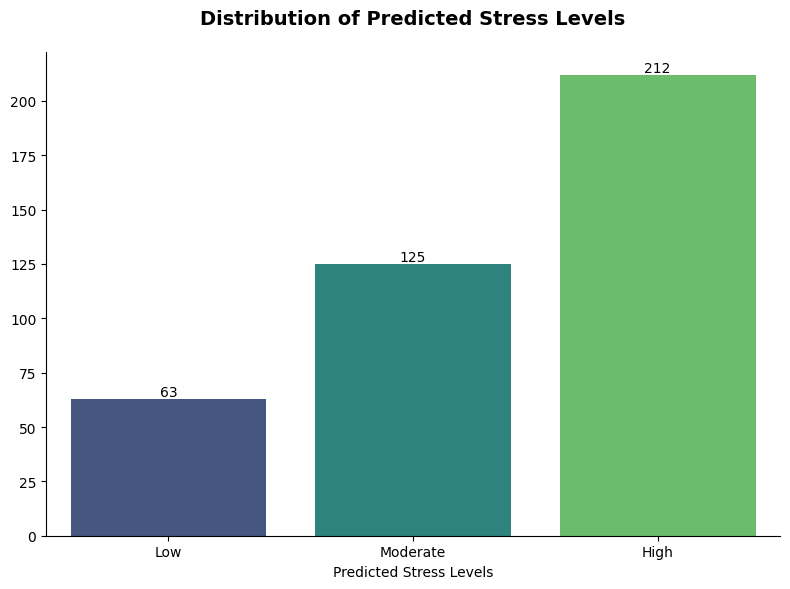

In [245]:
y_pred = voting_clf_soft.predict(X_val_prepared)

# Map the encoded predictions back to the original stress level categories
mapping_stress_reverse = {0: "Low", 1: "Moderate", 2: "High"}
y_pred_mapped = pd.Series(y_pred).map(mapping_stress_reverse)

# Plot the distribution of predicted stress levels
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_pred_mapped, palette="viridis", order=["Low", "Moderate", "High"])
sns.despine(left=False, bottom=False)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=10)

plt.title("Distribution of Predicted Stress Levels", weight="bold", fontsize=14, pad=20)
plt.ylabel("")
plt.xlabel("Predicted Stress Levels")
plt.tight_layout()
plt.show()

PermutationExplainer explainer: 51it [40:07, 48.15s/it]                        


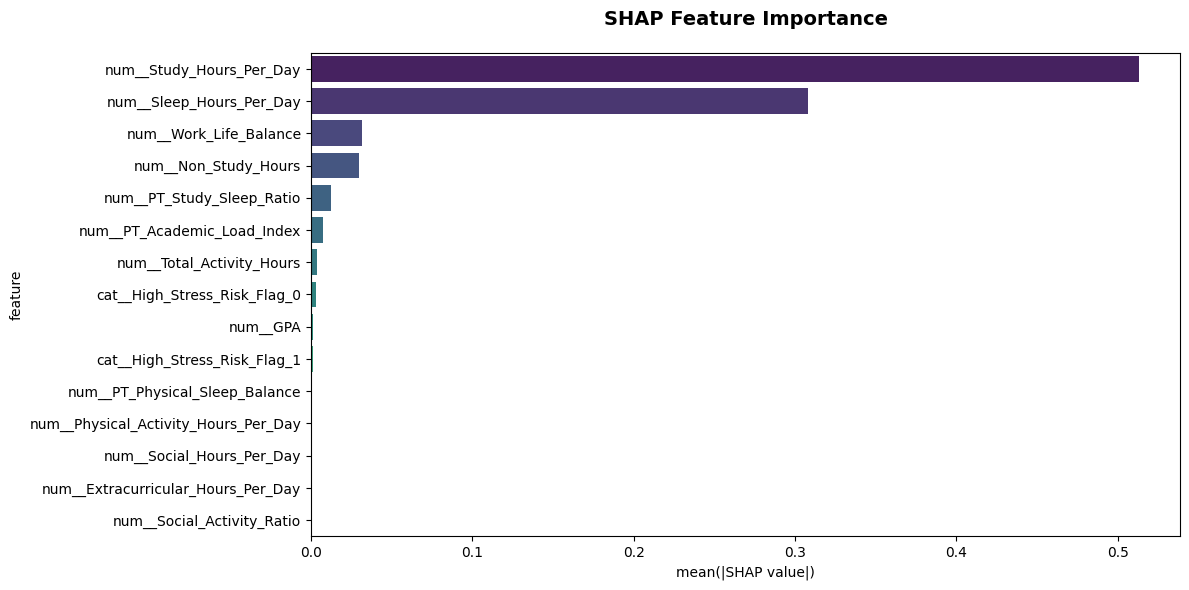

In [248]:
shap_sample = X_val_prepared.iloc[:50] if isinstance(X_val_prepared, pd.DataFrame) else X_val_prepared[:50]
shap_plot(model=voting_clf_soft, X_test=shap_sample, list_feature=list_feature_prepared, type="bar")

**Key Findings**

1. **num\_\_Study\_Hours\_Per\_Day**

   * Has the **largest influence**, far above all others.
   * This indicates that daily study hours are the **core driver** of the model’s predictions.

2. **num\_\_Sleep\_Hours\_Per\_Day**

   * Ranked second, also with strong impact.
   * Sleep duration (too little or too much) plays an important role in the prediction outcome.

3. **num\_\_Work\_Life\_Balance** & **num\_\_Non\_Study\_Hours**

   * Moderate influence.
   * Show that time spent outside of studying and perceived balance in life are relevant.

4. **Secondary features (small contributions)**

   * Includes derived indices like `PT_Study_Sleep_Ratio`, `PT_Academic_Load_Index`, `Total_Activity_Hours`, and categorical dummies such as `cat__High_Stress_Risk_Flag_0/1`.
   * Contribute very little → the model barely uses them.

5. **Minimal / negligible features**

   * `num__GPA`, `num__PT_Physical_Sleep_Balance`, `num__Physical_Activity_Hours_Per_Day`, `num__Social_Hours_Per_Day`, `num__Extracurricular_Hours_Per_Day`, `num__Social_Activity_Ratio`.
   * These can be downplayed in business interpretation, or even dropped during feature selection for simplification.

**Practical Meaning**

* **Study hours & sleep** → are the **key drivers** of the model → these should be the main focus when designing interventions for students.

  * Example: overstudying or lack of sleep can strongly predict high stress.
* **Work-life balance** and **non-study hours** → play a secondary yet still meaningful role.
* **Derived indices** (`ratio`, `index`) do not add much value, meaning the model already captured enough information from the raw features.

**Suggestions for Deeper Analysis**

* Plot a **SHAP summary (dot plot)** instead of bar to reveal direction of effect (whether higher values increase or decrease stress).
* Compare **importance between feature groups** (study, sleep, social activities) to see which group dominates.
* Use **SHAP dependence plots** for `Study_Hours_Per_Day` and `Sleep_Hours_Per_Day` to examine nonlinear effects (e.g., excessive study hours or insufficient sleep sharply increasing stress).

👉 **Conclusion**:
The model relies mainly on **daily study hours** and **sleep hours** for its predictions. Other features play minor, supporting roles. This is intuitive and aligns with the nature of stress and student life.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
